In [2]:
!unzip -q "/content/rossmann-store-sales.zip" -d "/content/rossmann_data/"

In [3]:
# CELL 1: Imports + paths

import pandas as pd
import numpy as np

DATA_DIR = "/content/rossmann_data"   # change if your folder name/path is different
TRAIN_PATH = f"{DATA_DIR}/train.csv"
STORE_PATH = f"{DATA_DIR}/store.csv"


In [4]:
# CELL 2: Load train.csv and store.csv

train = pd.read_csv(TRAIN_PATH)
store = pd.read_csv(STORE_PATH)

print("train shape:", train.shape)
print("store shape:", store.shape)
train.head()


train shape: (1017209, 9)
store shape: (1115, 10)


/tmp/ipython-input-1069280060.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(TRAIN_PATH)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# CELL 3: Quick look at store.csv

store.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
# CELL 4: Column overview + missing values

def overview(df, name="df"):
    print(f"\n{name} columns:", df.columns.tolist())
    print(f"{name} dtypes:\n", df.dtypes)
    print(f"\n{name} missing values (top):")
    na = df.isna().sum().sort_values(ascending=False)
    print(na[na>0].head(20))

overview(train, "train")
overview(store, "store")



train columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
train dtypes:
 Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

train missing values (top):
Series([], dtype: int64)

store columns: ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
store dtypes:
 Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object

In [8]:
# CELL 6
store.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
# CELL 7
train.isna().sum().sort_values(ascending=False).head(30)


,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [10]:
# CELL 8
store.isna().sum().sort_values(ascending=False).head(30)

,0
PromoInterval,544
Promo2SinceYear,544
Promo2SinceWeek,544
CompetitionOpenSinceYear,354
CompetitionOpenSinceMonth,354
CompetitionDistance,3
StoreType,0
Store,0
Assortment,0
Promo2,0


In [12]:
# CELL 1: load train + store

import pandas as pd
import numpy as np

DATA_DIR = "/content/rossmann_data"
train_path = f"{DATA_DIR}/train.csv"
store_path = f"{DATA_DIR}/store.csv"

train = pd.read_csv(train_path, dtype={"StateHoliday": "string"}, low_memory=False)
store = pd.read_csv(store_path, low_memory=False)

train["Date"] = pd.to_datetime(train["Date"])


In [14]:
# CELL 1: load train + store

import pandas as pd
import numpy as np

DATA_DIR = "/content/rossmann_data"
train_path = f"{DATA_DIR}/train.csv"
store_path = f"{DATA_DIR}/store.csv"

train = pd.read_csv(train_path, dtype={"StateHoliday": "string"}, low_memory=False)
store = pd.read_csv(store_path, low_memory=False)

train["Date"] = pd.to_datetime(train["Date"])


In [17]:
# CELL 3: basic overview

print("df shape:", df.shape)
print("date range:", df["Date"].min(), "to", df["Date"].max())
print("unique stores:", df["Store"].nunique())
df.head()


df shape: (1017209, 18)
date range: 2013-01-01 00:00:00 to 2015-07-31 00:00:00
unique stores: 1115


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [18]:
# CELL 4: missing values

df.isna().sum().sort_values(ascending=False).head(30)


,0
Promo2SinceWeek,508031
PromoInterval,508031
Promo2SinceYear,508031
CompetitionOpenSinceYear,323348
CompetitionOpenSinceMonth,323348
CompetitionDistance,2642
DayOfWeek,0
Store,0
Date,0
Sales,0


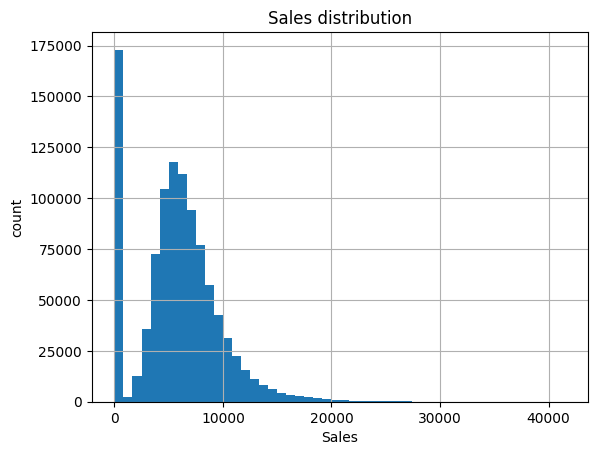

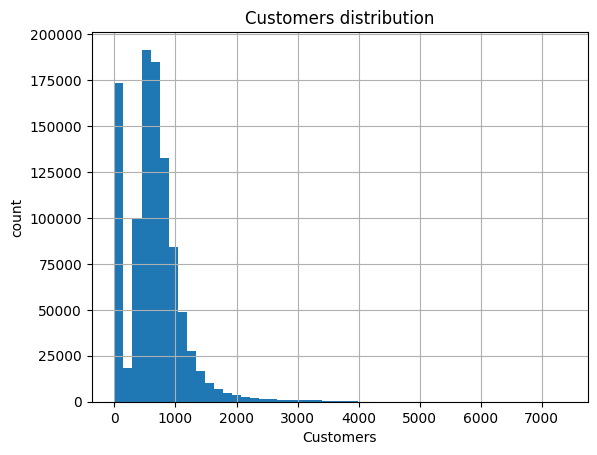

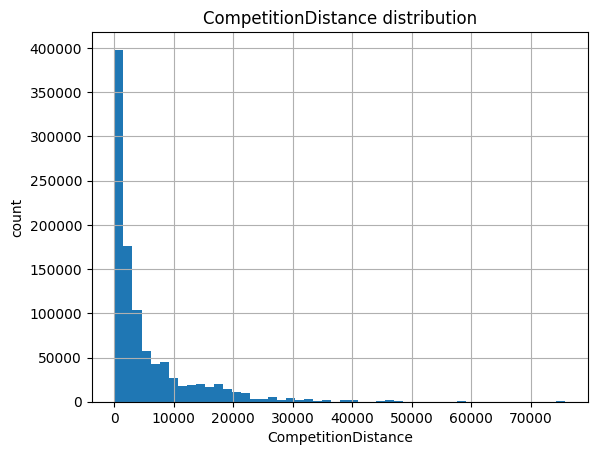

In [19]:
# CELL 5: numeric distributions (hist)

import matplotlib.pyplot as plt

num_cols = ["Sales","Customers","CompetitionDistance"]
for c in num_cols:
    if c in df.columns:
        plt.figure()
        df[c].dropna().hist(bins=50)
        plt.title(f"{c} distribution")
        plt.xlabel(c)
        plt.ylabel("count")
        plt.show()


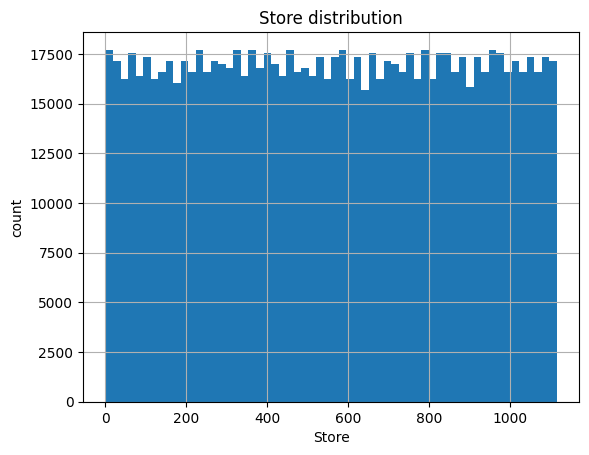

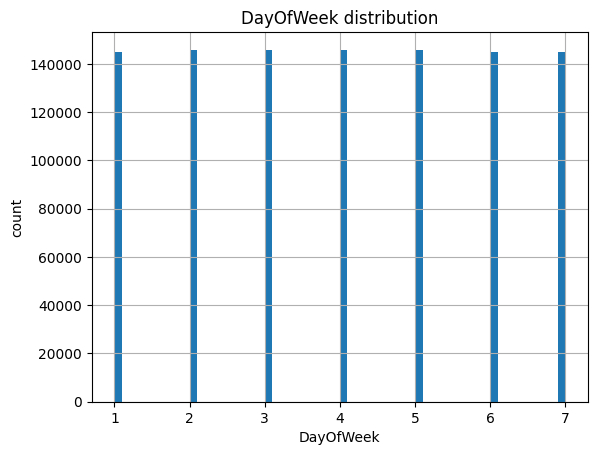

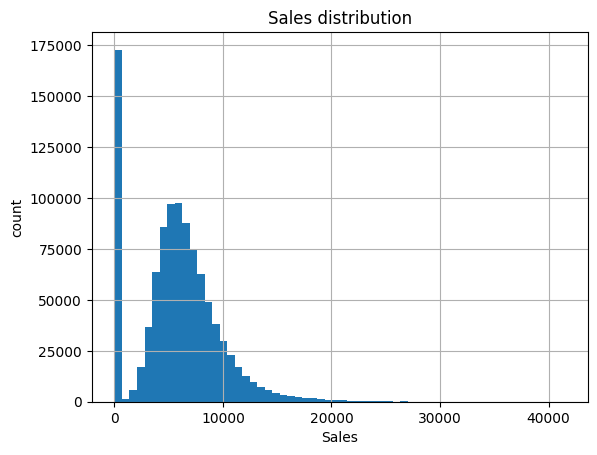

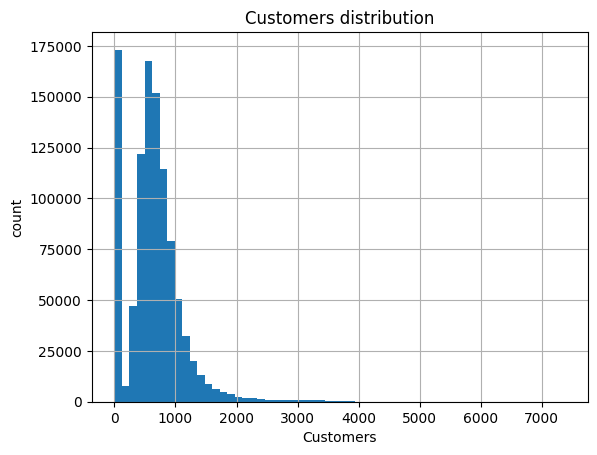

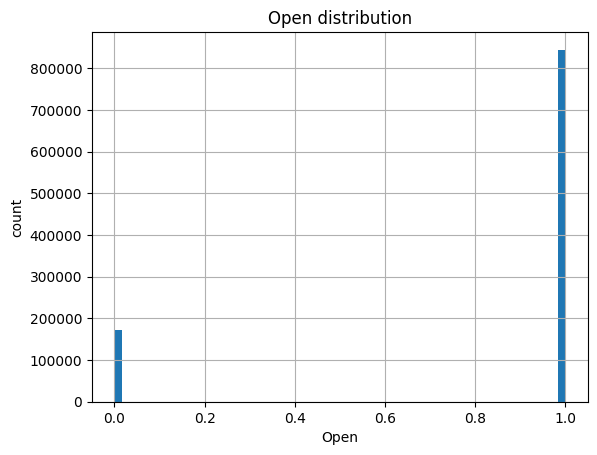

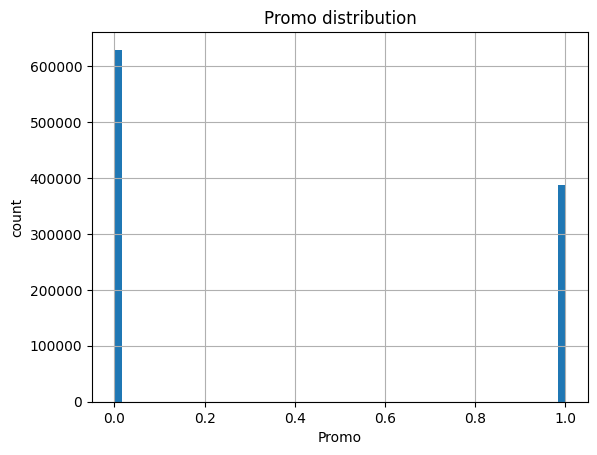

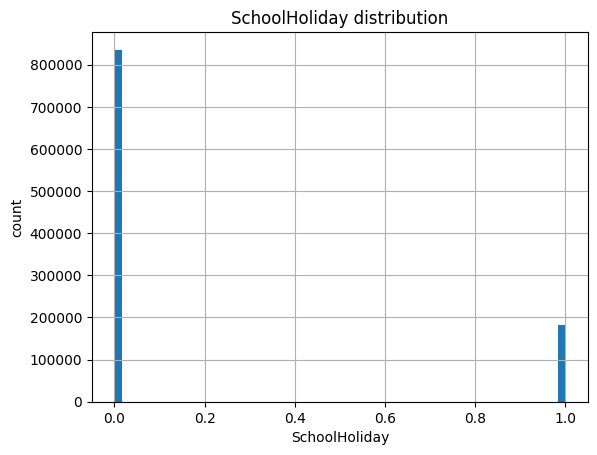

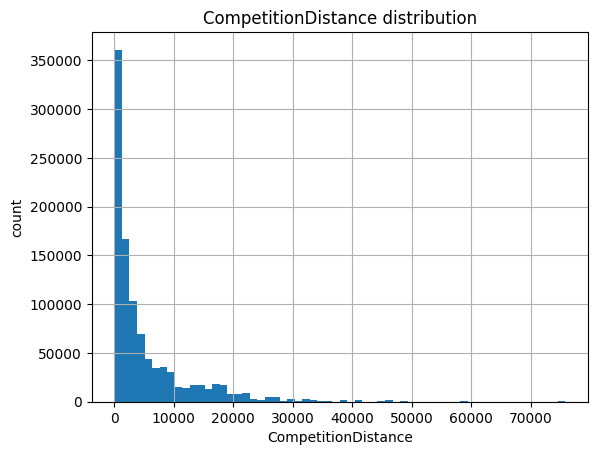

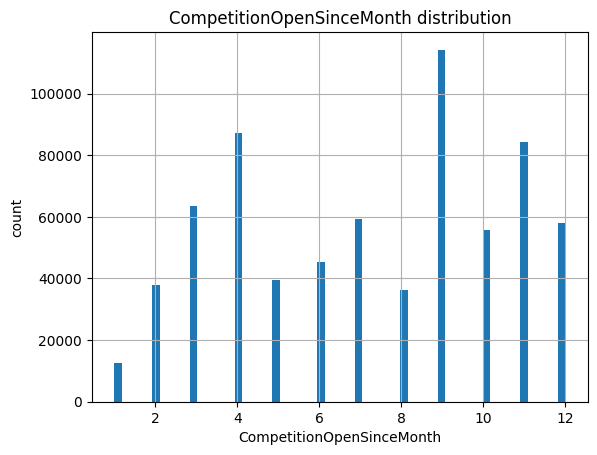

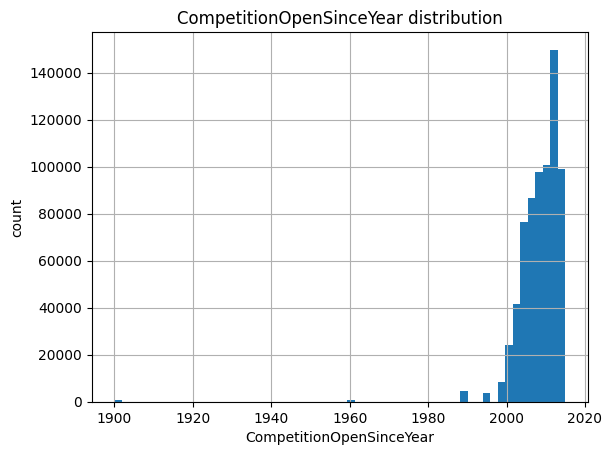

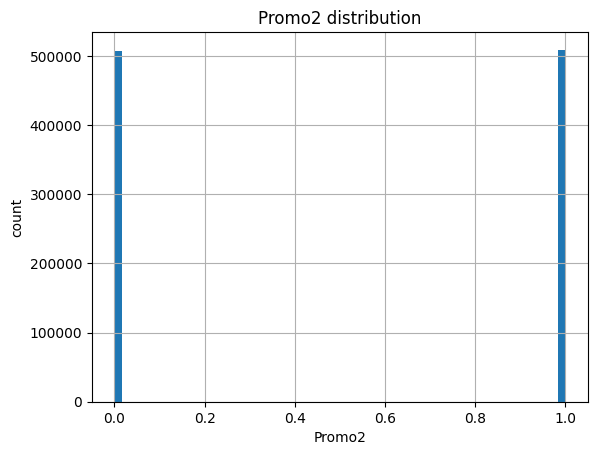

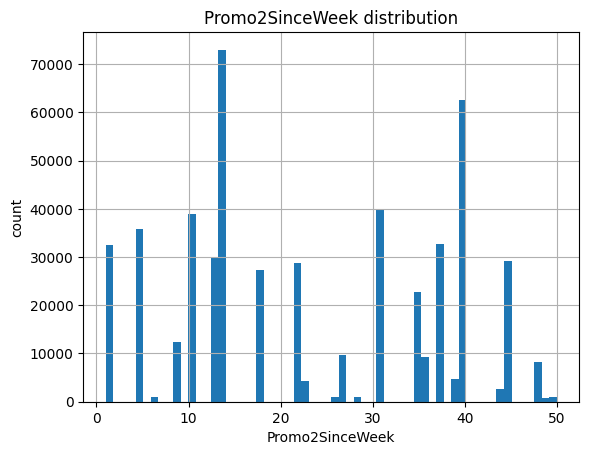

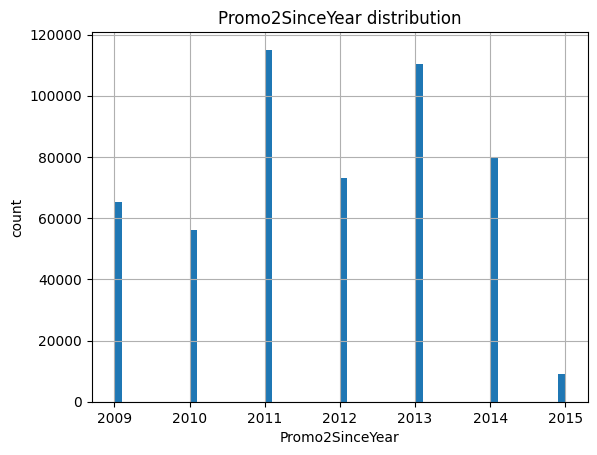

In [20]:
# CELL 5: numeric distributions (hist) - ALL numeric columns

import matplotlib.pyplot as plt
import numpy as np

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for c in num_cols:
    plt.figure()
    df[c].dropna().hist(bins=60)
    plt.title(f"{c} distribution")
    plt.xlabel(c)
    plt.ylabel("count")
    plt.show()


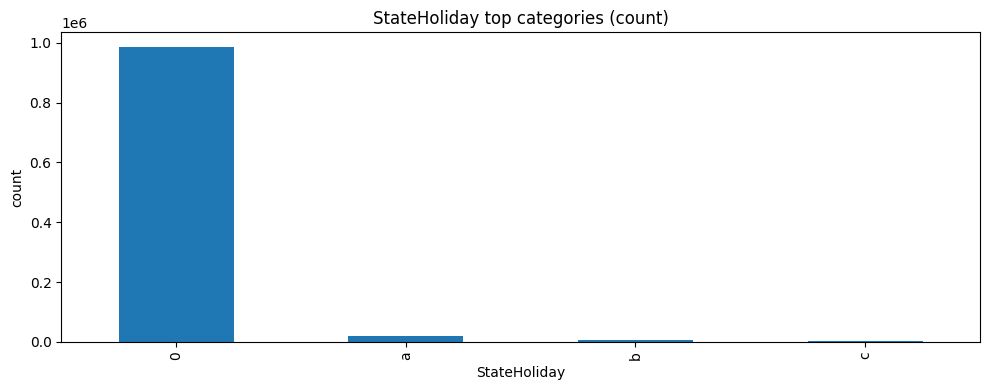

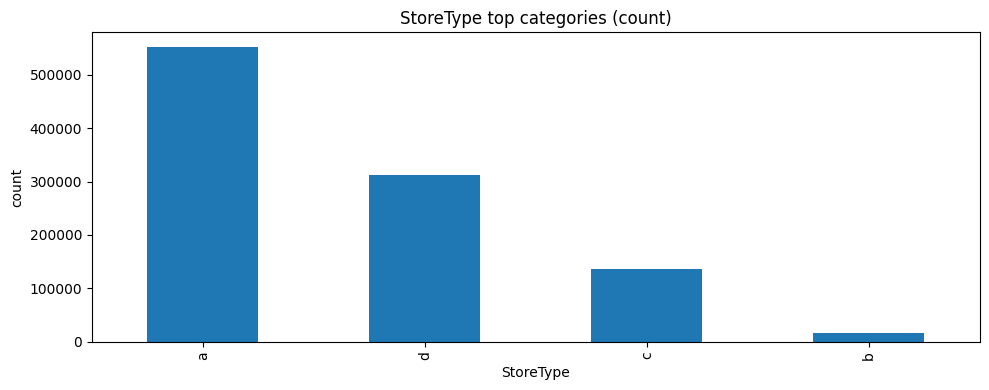

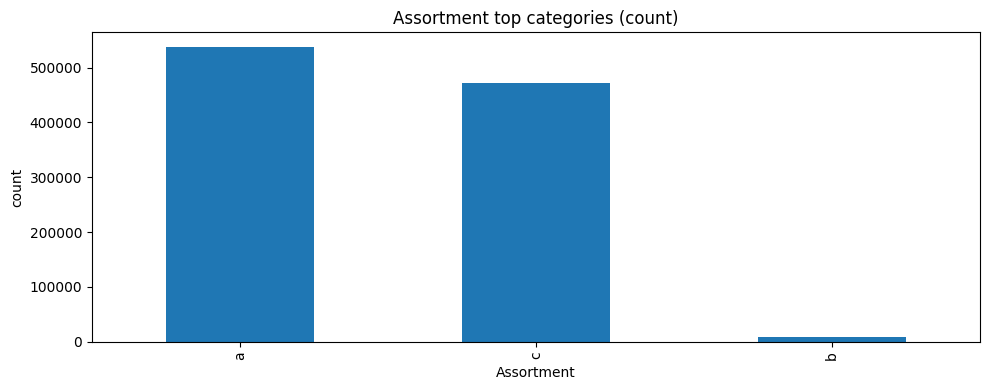

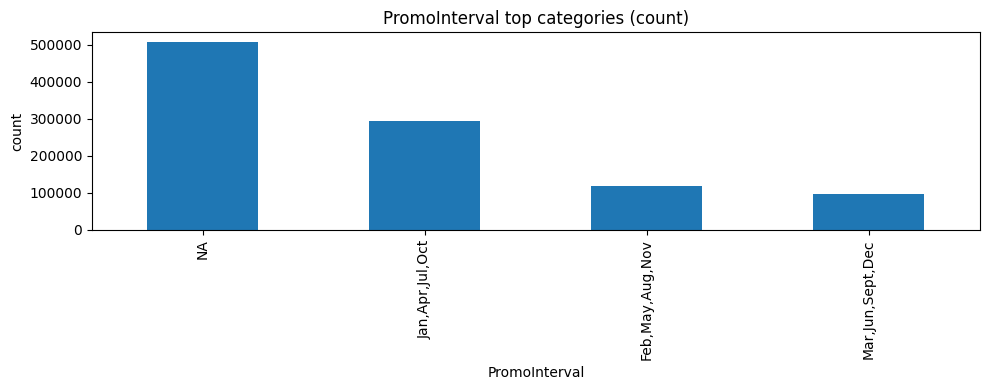

In [21]:
# CELL 6: categorical distributions (bar counts) - ALL categorical columns

cat_cols = df.select_dtypes(include=["object", "string"]).columns.tolist()

for c in cat_cols:
    vc = df[c].astype("string").fillna("NA").value_counts().head(30)
    plt.figure(figsize=(10,4))
    vc.plot(kind="bar")
    plt.title(f"{c} top categories (count)")
    plt.xlabel(c)
    plt.ylabel("count")
    plt.tight_layout()
    plt.show()


In [22]:
# CELL 7: sales vs key flags (Open/Promo/Holidays)

print("Sales by Open:")
print(df.groupby("Open")["Sales"].agg(["count","mean","median","sum"]))

print("\nSales by Promo:")
print(df.groupby("Promo")["Sales"].agg(["count","mean","median","sum"]))

print("\nSales by SchoolHoliday:")
print(df.groupby("SchoolHoliday")["Sales"].agg(["count","mean","median","sum"]))

print("\nSales by StateHoliday:")
print(df.groupby("StateHoliday")["Sales"].agg(["count","mean","median","sum"]).sort_values("mean", ascending=False))


Sales by Open:
       count         mean  median         sum
Open                                         
0     172817     0.000000     0.0           0
1     844392  6955.514291  6369.0  5873180623

Sales by Promo:
        count         mean  median         sum
Promo                                         
0      629129  4406.050805  4622.0  2771974337
1      388080  7991.152046  7553.0  3101206286

Sales by SchoolHoliday:
                count         mean  median         sum
SchoolHoliday                                         
0              835488  5620.979034  5642.0  4696260531
1              181721  6476.522207  6197.0  1176920092

Sales by StateHoliday:
               count         mean  median         sum
StateHoliday                                         
0             986159  5947.483893  5849.0  5865164768
a              20260   290.735686     0.0     5890305
b               6690   214.311510     0.0     1433744
c               4100   168.733171     0.0      691806


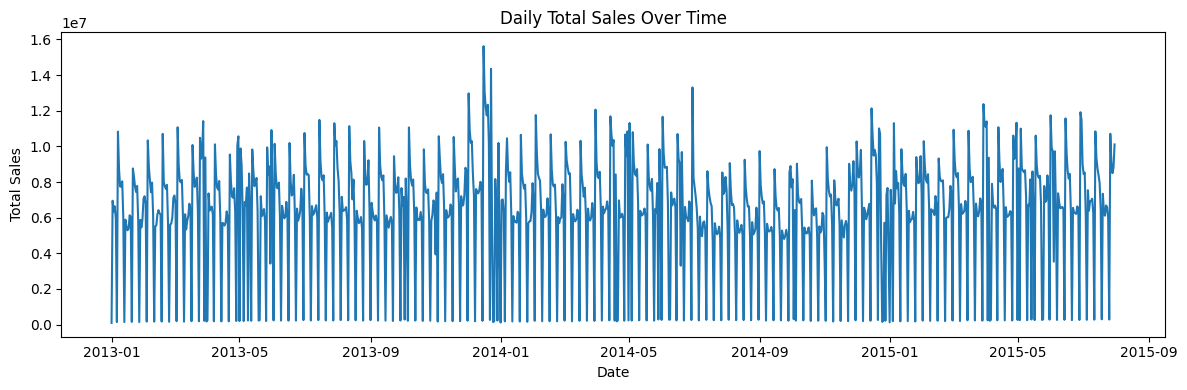

In [23]:
# CELL 8: time series trend (daily total sales)

daily_total = df.groupby("Date", as_index=False)["Sales"].sum()

plt.figure(figsize=(12,4))
plt.plot(daily_total["Date"], daily_total["Sales"])
plt.title("Daily Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


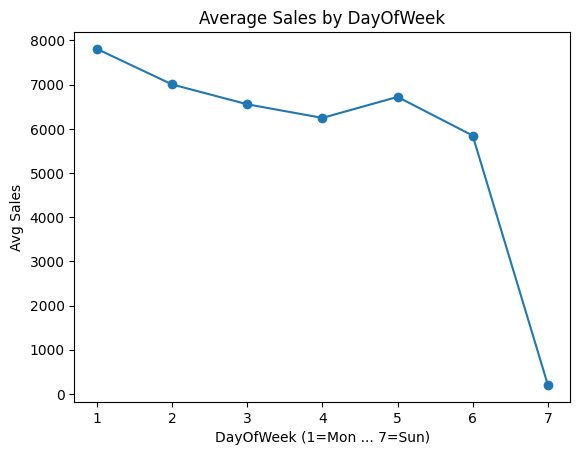

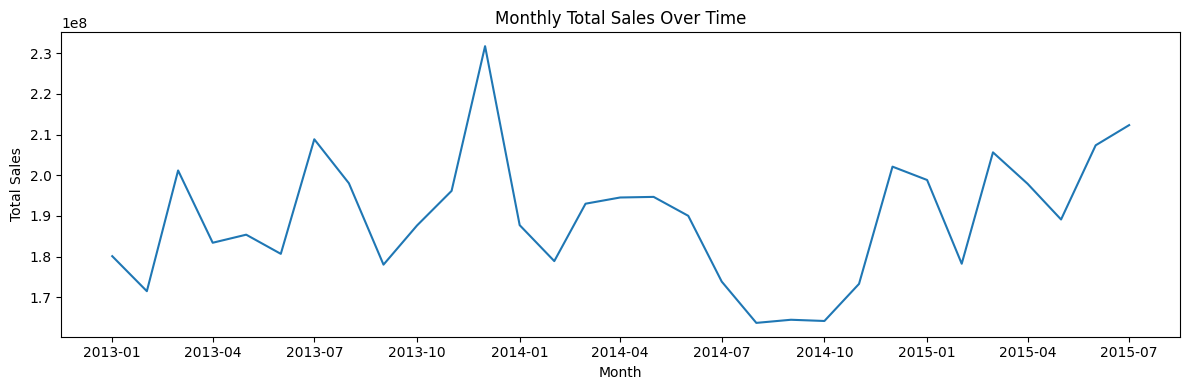

In [24]:
# CELL 9: seasonality checks (DayOfWeek + monthly)

# DayOfWeek seasonality
dow = df.groupby("DayOfWeek", as_index=False)["Sales"].mean()
plt.figure()
plt.plot(dow["DayOfWeek"], dow["Sales"], marker="o")
plt.title("Average Sales by DayOfWeek")
plt.xlabel("DayOfWeek (1=Mon ... 7=Sun)")
plt.ylabel("Avg Sales")
plt.show()

# Monthly seasonality (aggregate to month)
df["YearMonth"] = df["Date"].dt.to_period("M").dt.to_timestamp()
monthly_total = df.groupby("YearMonth", as_index=False)["Sales"].sum()

plt.figure(figsize=(12,4))
plt.plot(monthly_total["YearMonth"], monthly_total["Sales"])
plt.title("Monthly Total Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


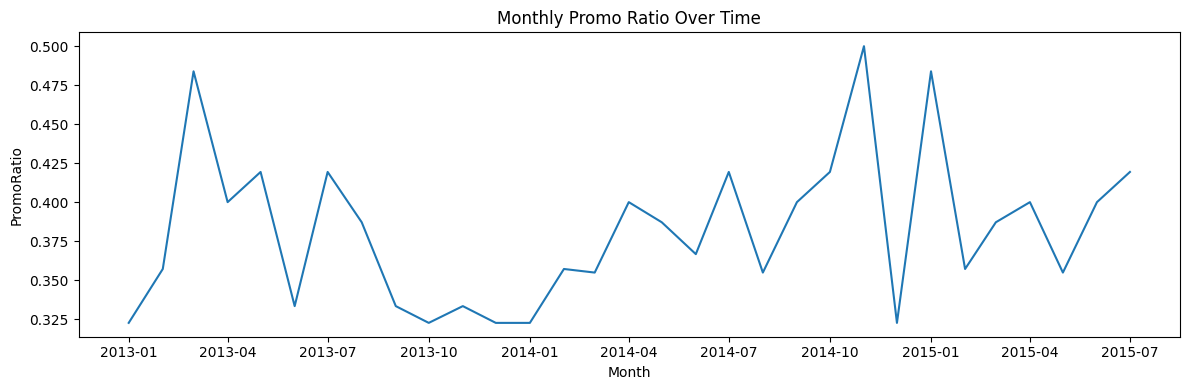

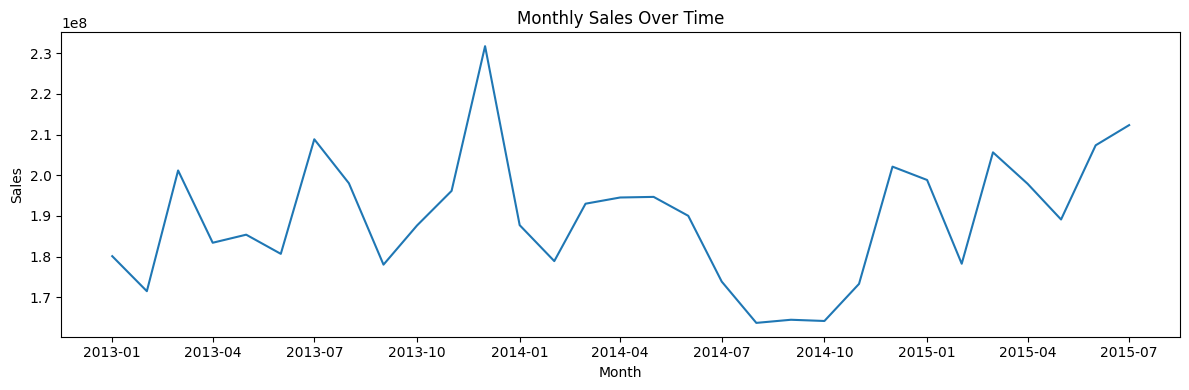

In [25]:
# CELL 10: promo impact over time (monthly promo ratio vs sales)

monthly = df.groupby("YearMonth", as_index=False).agg(
    Sales=("Sales","sum"),
    PromoDays=("Promo","sum"),
    TotalDays=("Promo","count")
)
monthly["PromoRatio"] = monthly["PromoDays"] / monthly["TotalDays"]

plt.figure(figsize=(12,4))
plt.plot(monthly["YearMonth"], monthly["PromoRatio"])
plt.title("Monthly Promo Ratio Over Time")
plt.xlabel("Month")
plt.ylabel("PromoRatio")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(monthly["YearMonth"], monthly["Sales"])
plt.title("Monthly Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


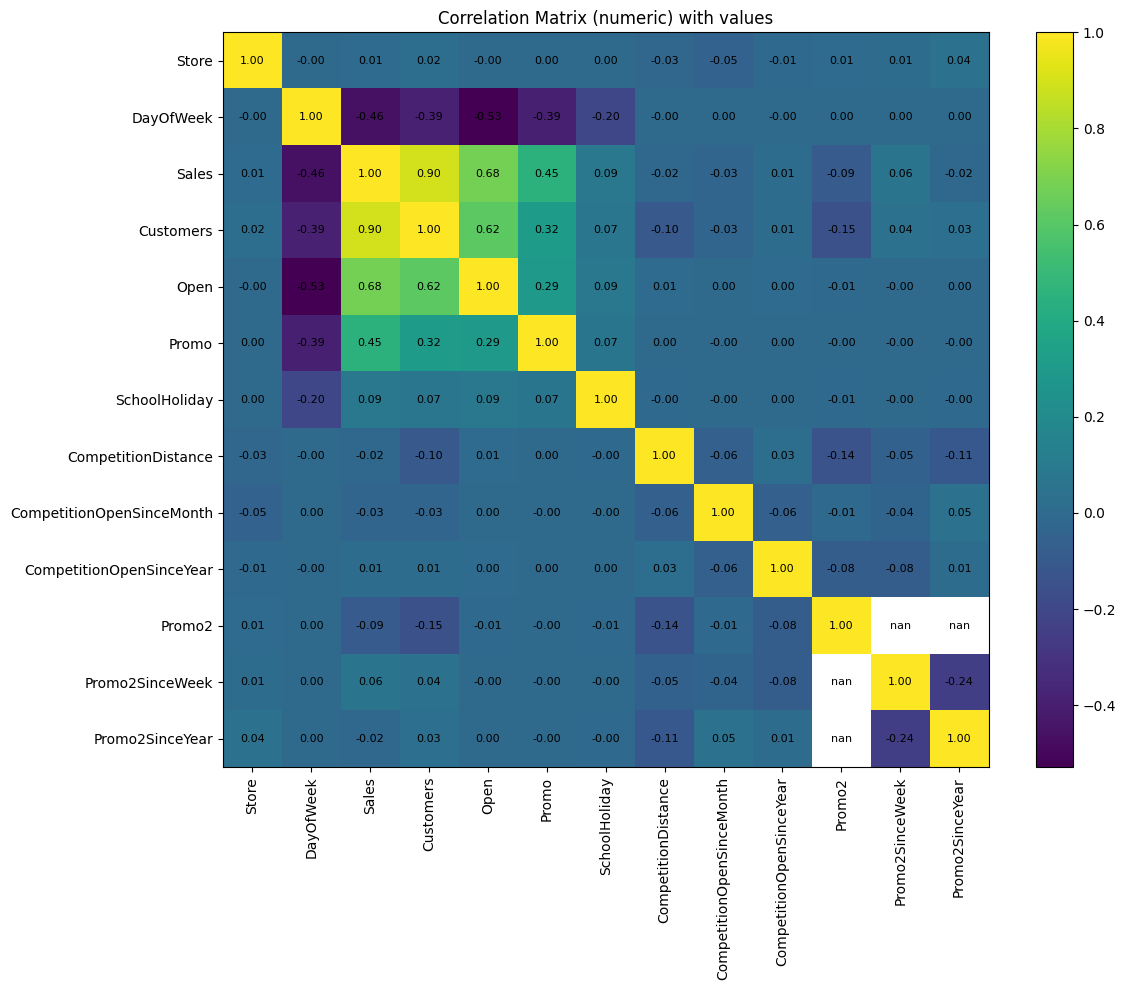

In [27]:
# CELL: correlation matrix (numeric) + values neatly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=[np.number]).copy()
corr = numeric_df.corr(numeric_only=True).round(3)

# show full correlation table (values)
corr
# CELL: correlation heatmap (with values on plot)

import matplotlib.pyplot as plt
import numpy as np

labels = corr.columns.tolist()
mat = corr.values
n = len(labels)

plt.figure(figsize=(12, 10))
plt.imshow(mat, aspect="auto")
plt.colorbar()

plt.xticks(range(n), labels, rotation=90)
plt.yticks(range(n), labels)

for i in range(n):
    for j in range(n):
        plt.text(j, i, f"{mat[i, j]:.2f}", ha="center", va="center", fontsize=8)

plt.title("Correlation Matrix (numeric) with values")
plt.tight_layout()
plt.show()


In [28]:
# CELL: missing values count (df)

df.isna().sum().sort_values(ascending=False)


,0
Promo2SinceYear,508031
Promo2SinceWeek,508031
PromoInterval,508031
CompetitionOpenSinceYear,323348
CompetitionOpenSinceMonth,323348
CompetitionDistance,2642
Store,0
Date,0
DayOfWeek,0
Sales,0


In [29]:
# CELL: impute only the missing columns you listed

import numpy as np

# 1) CompetitionDistance (small missing) -> median + missing flag
df["CompetitionDistanceMissing"] = df["CompetitionDistance"].isna().astype(int)
df["CompetitionDistance"] = df["CompetitionDistance"].fillna(df["CompetitionDistance"].median())

# 2) Competition open info -> flag + fill with 0
df["HasCompetitionInfo"] = (~df["CompetitionOpenSinceYear"].isna()).astype(int)
df["CompetitionOpenSinceMonth"] = df["CompetitionOpenSinceMonth"].fillna(0).astype(int)
df["CompetitionOpenSinceYear"]  = df["CompetitionOpenSinceYear"].fillna(0).astype(int)

# 3) Promo2 info -> fill with 0 / "None"
df["Promo2SinceWeek"] = df["Promo2SinceWeek"].fillna(0).astype(int)
df["Promo2SinceYear"] = df["Promo2SinceYear"].fillna(0).astype(int)
df["PromoInterval"]   = df["PromoInterval"].fillna("None").astype(str)

# check
df[["Promo2SinceYear","Promo2SinceWeek","PromoInterval",
    "CompetitionOpenSinceYear","CompetitionOpenSinceMonth","CompetitionDistance"]].isna().sum()


,0
Promo2SinceYear,0
Promo2SinceWeek,0
PromoInterval,0
CompetitionOpenSinceYear,0
CompetitionOpenSinceMonth,0
CompetitionDistance,0


In [30]:
# CELL: check duplicate rows in df

dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

# show some duplicates if any
if dup_count > 0:
    display(df[df.duplicated(keep=False)].sort_values(["Store", "Date"]).head(50))


Duplicate rows: 0


In [43]:
# CELL 1: detect outliers (IQR) for required continuous columns only

import numpy as np
import pandas as pd

required_cols = ["Sales", "Customers", "CompetitionDistance"]

rows = []
for c in required_cols:
    s = df[c].dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    out_cnt = int(((s < low) | (s > high)).sum())
    rows.append([c, len(s), q1, q3, low, high, out_cnt, out_cnt/len(s)])

outlier_required = pd.DataFrame(
    rows,
    columns=["column","count","q1","q3","low_thr","high_thr","outliers_cnt","outliers_pct"]
).sort_values("outliers_cnt", ascending=False)

outlier_required


,column,count,q1,q3,low_thr,high_thr,outliers_cnt,outliers_pct
2,CompetitionDistance,1017209,710.0,6880.0,-8545.0,16135.0,99160,0.097482
1,Customers,1017209,405.0,837.0,-243.0,1485.0,38095,0.037451
0,Sales,1017209,3727.0,7856.0,-2466.5,14049.5,26694,0.026242


In [44]:
# CELL 2: cap outliers (winsorize 1% - 99%) for required columns only

def cap_series(s: pd.Series, lower_q=0.01, upper_q=0.99):
    lo = s.quantile(lower_q)
    hi = s.quantile(upper_q)
    return s.clip(lo, hi), float(lo), float(hi)

cap_info = {}

df["Sales_capped"], lo, hi = cap_series(df["Sales"], 0.01, 0.99)
cap_info["Sales"] = (lo, hi)

df["Customers_capped"], lo, hi = cap_series(df["Customers"], 0.01, 0.99)
cap_info["Customers"] = (lo, hi)

df["CompetitionDistance_capped"], lo, hi = cap_series(df["CompetitionDistance"], 0.01, 0.99)
cap_info["CompetitionDistance"] = (lo, hi)

print("CAPPED RANGES (1% - 99%)")
for k,(lo,hi) in cap_info.items():
    print(f"{k}: {lo} to {hi}")


CAPPED RANGES (1% - 99%)
Sales: 0.0 to 17160.0
Customers: 0.0 to 2267.0
CompetitionDistance: 50.0 to 36410.0


/tmp/ipython-input-2282712582.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[orig].dropna(), df[cap].dropna()],


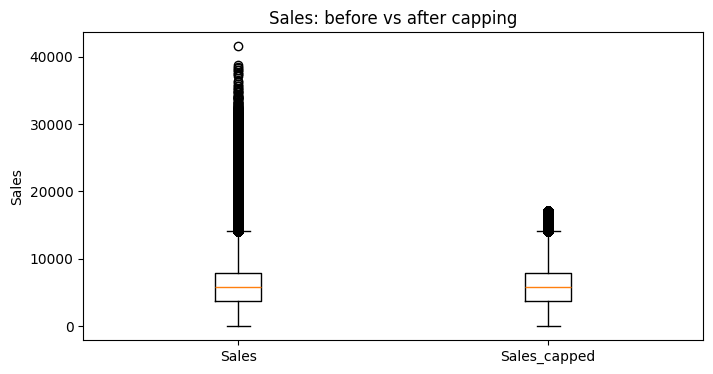

/tmp/ipython-input-2282712582.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[orig].dropna(), df[cap].dropna()],


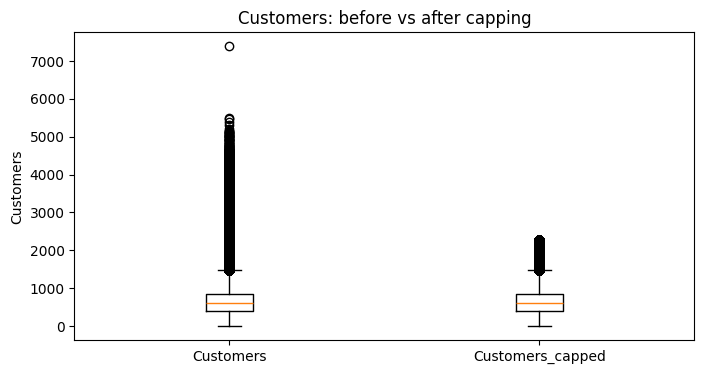

/tmp/ipython-input-2282712582.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[orig].dropna(), df[cap].dropna()],


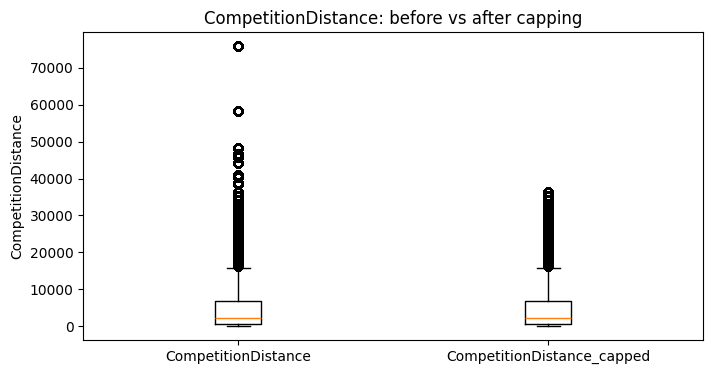

In [45]:
# CELL 4: boxplots (before vs after capping) for required columns

import matplotlib.pyplot as plt

pairs = [
    ("Sales", "Sales_capped"),
    ("Customers", "Customers_capped"),
    ("CompetitionDistance", "CompetitionDistance_capped")
]

for orig, cap in pairs:
    plt.figure(figsize=(8,4))
    plt.boxplot([df[orig].dropna(), df[cap].dropna()],
                labels=[orig, cap],
                showfliers=True)
    plt.title(f"{orig}: before vs after capping")
    plt.ylabel(orig)
    plt.show()


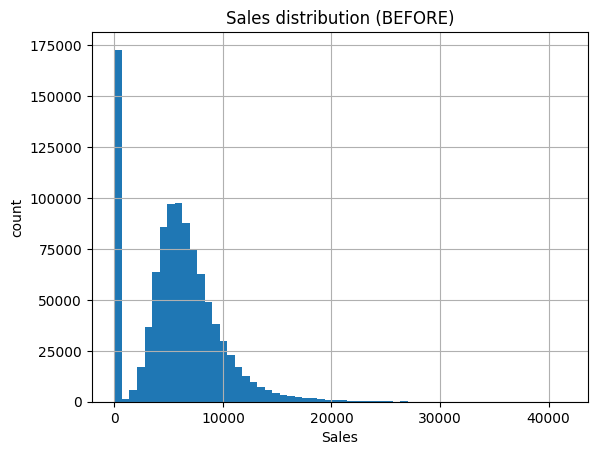

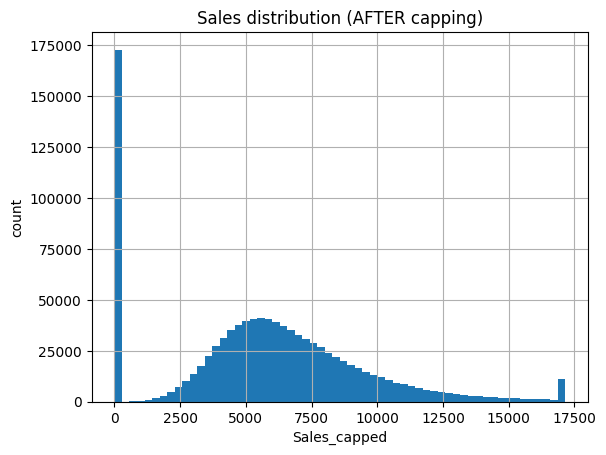

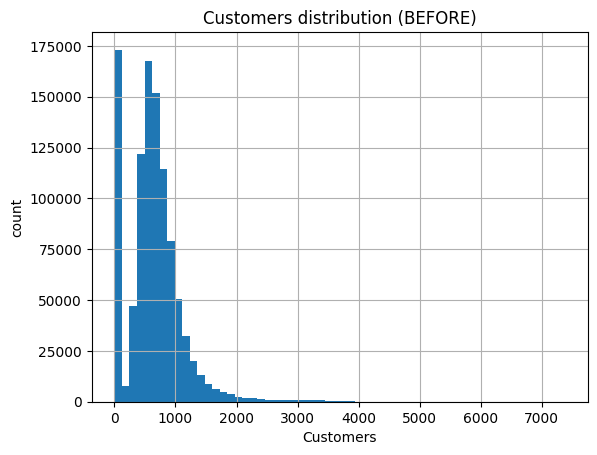

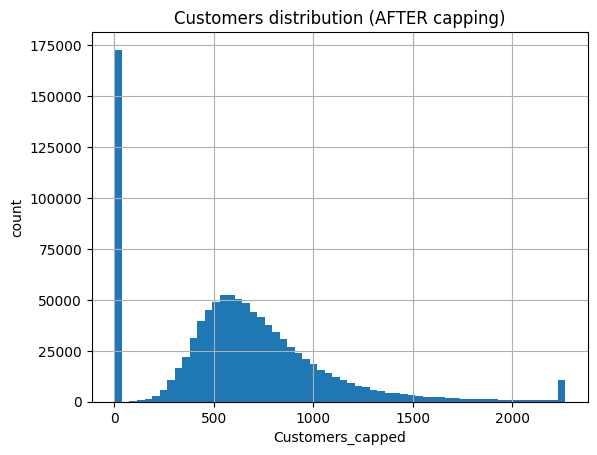

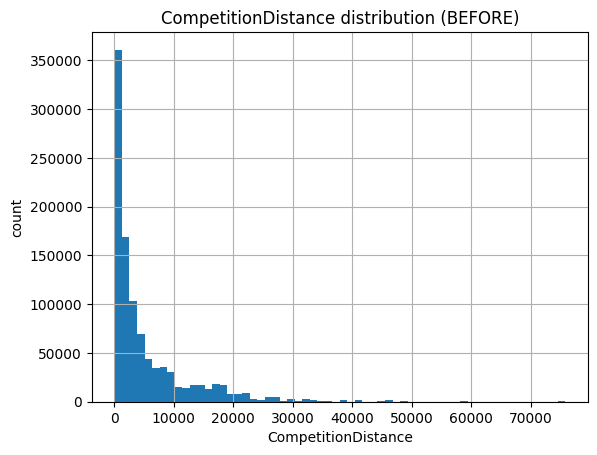

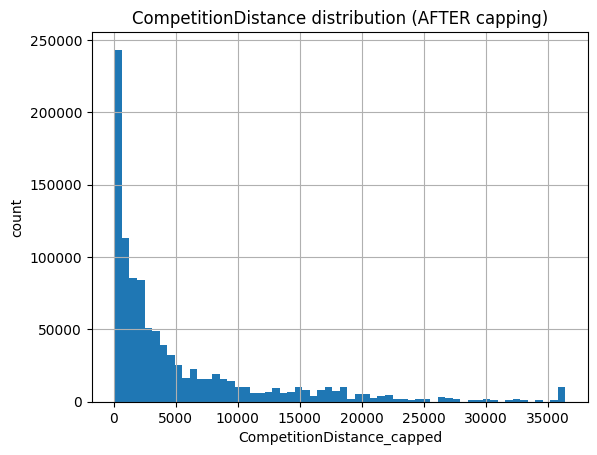

In [46]:
# CELL 5: before vs after distributions (hist) for required columns

import matplotlib.pyplot as plt

pairs = [
    ("Sales", "Sales_capped"),
    ("Customers", "Customers_capped"),
    ("CompetitionDistance", "CompetitionDistance_capped")
]

for orig, cap in pairs:
    plt.figure()
    df[orig].dropna().hist(bins=60)
    plt.title(f"{orig} distribution (BEFORE)")
    plt.xlabel(orig)
    plt.ylabel("count")
    plt.show()

    plt.figure()
    df[cap].dropna().hist(bins=60)
    plt.title(f"{orig} distribution (AFTER capping)")
    plt.xlabel(cap)
    plt.ylabel("count")
    plt.show()


In [47]:
# max should reduce after capping
print("Sales max:", df["Sales"].max())
print("Sales_capped max:", df["Sales_capped"].max())

# count of values that were actually clipped (changed)
print("Clipped count:", (df["Sales"] != df["Sales_capped"]).sum())


Sales max: 41551
Sales_capped max: 17160
Clipped count: 10172


In [48]:
# CELL 1: create time-based features (from Date)

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["WeekOfYear"] = df["Date"].dt.isocalendar().week.astype(int)
df["Quarter"] = df["Date"].dt.quarter

df["Month_sin"] = np.sin(2 * np.pi * df["Month"] / 12)
df["Month_cos"] = np.cos(2 * np.pi * df["Month"] / 12)

df[["Date","Year","Month","Day","WeekOfYear","Quarter","Month_sin","Month_cos"]].head()


,Date,Year,Month,Day,WeekOfYear,Quarter,Month_sin,Month_cos
0,2015-07-31,2015,7,31,31,3,-0.5,-0.866025
1,2015-07-31,2015,7,31,31,3,-0.5,-0.866025
2,2015-07-31,2015,7,31,31,3,-0.5,-0.866025
3,2015-07-31,2015,7,31,31,3,-0.5,-0.866025
4,2015-07-31,2015,7,31,31,3,-0.5,-0.866025


In [49]:
# CELL 2: create monthly dataset (Store, YearMonth) for forecasting

df["YearMonth"] = df["Date"].dt.to_period("M").dt.to_timestamp()

monthly_df = df.groupby(["Store","YearMonth"], as_index=False).agg(
    Sales=("Sales_capped","sum"),
    Customers=("Customers_capped","sum"),
    OpenDays=("Open","sum"),
    PromoDays=("Promo","sum"),
    SchoolHolidayDays=("SchoolHoliday","sum"),
    StateHolidayDays=("StateHoliday", lambda x: (x != "0").sum()),
    CompetitionDistance=("CompetitionDistance_capped","first"),
    StoreType=("StoreType","first"),
    Assortment=("Assortment","first"),
    Promo2=("Promo2","first"),
    Promo2SinceWeek=("Promo2SinceWeek","first"),
    Promo2SinceYear=("Promo2SinceYear","first"),
    PromoInterval=("PromoInterval","first"),
    CompetitionOpenSinceMonth=("CompetitionOpenSinceMonth","first"),
    CompetitionOpenSinceYear=("CompetitionOpenSinceYear","first"),
    HasCompetitionInfo=("HasCompetitionInfo","first"),
    CompetitionDistanceMissing=("CompetitionDistanceMissing","first")
)

monthly_df.shape


(33485, 19)

In [50]:
# CELL 3: quick view of monthly_df

monthly_df.sort_values(["Store","YearMonth"]).head(20)


,Store,YearMonth,Sales,Customers,OpenDays,PromoDays,SchoolHolidayDays,StateHolidayDays,CompetitionDistance,StoreType,Assortment,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,HasCompetitionInfo,CompetitionDistanceMissing
0,1,2013-01-01,128431,15899,26,10,11,1,1270.0,c,a,0,0,0,None,9,2008,1,0
1,1,2013-02-01,125271,15189,24,10,0,0,1270.0,c,a,0,0,0,None,9,2008,1,0
2,1,2013-03-01,145169,17574,25,15,5,1,1270.0,c,a,0,0,0,None,9,2008,1,0
3,1,2013-04-01,118009,14382,25,12,5,1,1270.0,c,a,0,0,0,None,9,2008,1,0
4,1,2013-05-01,118225,13965,23,13,0,4,1270.0,c,a,0,0,0,None,9,2008,1,0
5,1,2013-06-01,113411,13567,25,10,0,0,1270.0,c,a,0,0,0,None,9,2008,1,0
6,1,2013-07-01,128032,14714,27,13,26,0,1270.0,c,a,0,0,0,None,9,2008,1,0
7,1,2013-08-01,118320,14230,27,12,16,0,1270.0,c,a,0,0,0,None,9,2008,1,0
8,1,2013-09-01,108867,13212,25,10,0,0,1270.0,c,a,0,0,0,None,9,2008,1,0
9,1,2013-10-01,114641,13960,26,10,12,1,1270.0,c,a,0,0,0,None,9,2008,1,0


In [51]:
# CELL 1: create lag features (monthly) for Sales

monthly_df = monthly_df.sort_values(["Store","YearMonth"]).reset_index(drop=True)

for lag in [1, 2, 3, 6, 12]:
    monthly_df[f"Sales_lag_{lag}"] = monthly_df.groupby("Store")["Sales"].shift(lag)

monthly_df[["Store","YearMonth","Sales","Sales_lag_1","Sales_lag_2","Sales_lag_3"]].head(20)


,Store,YearMonth,Sales,Sales_lag_1,Sales_lag_2,Sales_lag_3
0,1,2013-01-01,128431,NaN,NaN,NaN
1,1,2013-02-01,125271,128431.0,NaN,NaN
2,1,2013-03-01,145169,125271.0,128431.0,NaN
3,1,2013-04-01,118009,145169.0,125271.0,128431.0
4,1,2013-05-01,118225,118009.0,145169.0,125271.0
5,1,2013-06-01,113411,118225.0,118009.0,145169.0
6,1,2013-07-01,128032,113411.0,118225.0,118009.0
7,1,2013-08-01,118320,128032.0,113411.0,118225.0
8,1,2013-09-01,108867,118320.0,128032.0,113411.0
9,1,2013-10-01,114641,108867.0,118320.0,128032.0


In [52]:
# CELL 2: rolling features for Sales

for w in [3, 6, 12]:
    monthly_df[f"Sales_roll_mean_{w}"] = (
        monthly_df.groupby("Store")["Sales"].shift(1).rolling(w).mean().reset_index(level=0, drop=True)
    )
    monthly_df[f"Sales_roll_std_{w}"] = (
        monthly_df.groupby("Store")["Sales"].shift(1).rolling(w).std().reset_index(level=0, drop=True)
    )

monthly_df[[ "Store","YearMonth","Sales","Sales_roll_mean_3","Sales_roll_std_3"]].head(20)


,Store,YearMonth,Sales,Sales_roll_mean_3,Sales_roll_std_3
0,1,2013-01-01,128431,NaN,NaN
1,1,2013-02-01,125271,NaN,NaN
2,1,2013-03-01,145169,NaN,NaN
3,1,2013-04-01,118009,132957.000000,10693.273961
4,1,2013-05-01,118225,129483.000000,14061.369350
5,1,2013-06-01,113411,127134.333333,15618.852881
6,1,2013-07-01,128032,116548.333333,2719.155997
7,1,2013-08-01,118320,119889.333333,7451.235759
8,1,2013-09-01,108867,119921.000000,7440.820586
9,1,2013-10-01,114641,118406.333333,9582.791677


In [53]:
# CELL 3: create 3-step ahead targets (monthly)

monthly_df["y_t+1"] = monthly_df.groupby("Store")["Sales"].shift(-1)
monthly_df["y_t+2"] = monthly_df.groupby("Store")["Sales"].shift(-2)
monthly_df["y_t+3"] = monthly_df.groupby("Store")["Sales"].shift(-3)

monthly_df[["Store","YearMonth","Sales","y_t+1","y_t+2","y_t+3"]].head(20)


,Store,YearMonth,Sales,y_t+1,y_t+2,y_t+3
0,1,2013-01-01,128431,125271.0,145169.0,118009.0
1,1,2013-02-01,125271,145169.0,118009.0,118225.0
2,1,2013-03-01,145169,118009.0,118225.0,113411.0
3,1,2013-04-01,118009,118225.0,113411.0,128032.0
4,1,2013-05-01,118225,113411.0,128032.0,118320.0
5,1,2013-06-01,113411,128032.0,118320.0,108867.0
6,1,2013-07-01,128032,118320.0,108867.0,114641.0
7,1,2013-08-01,118320,108867.0,114641.0,127596.0
8,1,2013-09-01,108867,114641.0,127596.0,145168.0
9,1,2013-10-01,114641,127596.0,145168.0,118814.0


In [54]:
# CELL 4: drop rows where lag/targets are not available (ready for modeling)

feature_cols = [c for c in monthly_df.columns if c not in ["y_t+1","y_t+2","y_t+3"]]
model_df = monthly_df.dropna(subset=["Sales_lag_12","y_t+1","y_t+2","y_t+3"]).reset_index(drop=True)

model_df.shape


(16760, 33)

In [55]:
# CELL 1: define features and targets (from model_df)

import numpy as np
import pandas as pd

target_cols = ["y_t+1", "y_t+2", "y_t+3"]
drop_cols = ["YearMonth"] + target_cols

feature_cols = [c for c in model_df.columns if c not in drop_cols]

cat_cols = ["StoreType", "Assortment", "PromoInterval"]
cat_cols = [c for c in cat_cols if c in feature_cols]

num_cols = [c for c in feature_cols if c not in cat_cols]

X = model_df[feature_cols].copy()
y1 = model_df["y_t+1"].copy()
y2 = model_df["y_t+2"].copy()
y3 = model_df["y_t+3"].copy()

feature_cols, cat_cols[:], len(num_cols)


(['Store',
  'Sales',
  'Customers',
  'OpenDays',
  'PromoDays',
  'SchoolHolidayDays',
  'StateHolidayDays',
  'CompetitionDistance',
  'StoreType',
  'Assortment',
  'Promo2',
  'Promo2SinceWeek',
  'Promo2SinceYear',
  'PromoInterval',
  'CompetitionOpenSinceMonth',
  'CompetitionOpenSinceYear',
  'HasCompetitionInfo',
  'CompetitionDistanceMissing',
  'Sales_lag_1',
  'Sales_lag_2',
  'Sales_lag_3',
  'Sales_lag_6',
  'Sales_lag_12',
  'Sales_roll_mean_3',
  'Sales_roll_std_3',
  'Sales_roll_mean_6',
  'Sales_roll_std_6',
  'Sales_roll_mean_12',
  'Sales_roll_std_12'],
 ['StoreType', 'Assortment', 'PromoInterval'],
 26)

In [56]:
# CELL 2: time-based split (last 6 months validation)

cutoff = model_df["YearMonth"].max() - pd.DateOffset(months=6)

train_idx = model_df["YearMonth"] <= cutoff
val_idx   = model_df["YearMonth"] >  cutoff

X_train, X_val = X.loc[train_idx], X.loc[val_idx]
y1_train, y1_val = y1.loc[train_idx], y1.loc[val_idx]
y2_train, y2_val = y2.loc[train_idx], y2.loc[val_idx]
y3_train, y3_val = y3.loc[train_idx], y3.loc[val_idx]

X_train.shape, X_val.shape, cutoff


((10430, 29), (6330, 29), Timestamp('2014-10-01 00:00:00'))

In [57]:
# CELL 3: OHE -> sparse matrix

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ],
    remainder="drop"
)

Xtr_sparse = preprocess.fit_transform(X_train)
Xva_sparse = preprocess.transform(X_val)

Xtr_sparse.shape, Xva_sparse.shape


((10430, 37), (6330, 37))

In [59]:
# CELL: choose valid SVD candidates based on number of features

from sklearn.decomposition import TruncatedSVD
import numpy as np

n_features = Xtr_sparse.shape[1]
print("n_features after OHE:", n_features)

candidates = [5, 10, 15, 20, 25, 30, 35]
candidates = [k for k in candidates if k <= n_features]

svd_results = []
for k in candidates:
    svd = TruncatedSVD(n_components=k, random_state=42)
    svd.fit(Xtr_sparse)
    cum_var = float(np.cumsum(svd.explained_variance_ratio_)[-1])
    svd_results.append((k, cum_var))

svd_results


n_features after OHE: 37


[(5, 0.9881624403008679),
 (10, 0.9987927366668535),
 (15, 0.9999963513887293),
 (20, 0.9999999999335543),
 (25, 0.9999999999915811),
 (30, 0.9999999999999464),
 (35, 1.0000000000000084)]

In [60]:
# CELL: apply SVD with chosen N_COMPONENTS

N_COMPONENTS = min(20, n_features)

svd = TruncatedSVD(n_components=N_COMPONENTS, random_state=42)
Xtr_svd = svd.fit_transform(Xtr_sparse)
Xva_svd = svd.transform(Xva_sparse)

Xtr_svd.shape, Xva_svd.shape


((10430, 20), (6330, 20))

In [61]:
# CELL: scale SVD features (recommended for Ridge)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtr_svd_scaled = scaler.fit_transform(Xtr_svd)
Xva_svd_scaled = scaler.transform(Xva_svd)

Xtr_svd_scaled.shape, Xva_svd_scaled.shape


((10430, 20), (6330, 20))

In [74]:
# CELL: scale SVD features (StandardScaler) - clean + safe

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)

Xtr_svd_scaled = scaler.fit_transform(Xtr_svd)
Xva_svd_scaled = scaler.transform(Xva_svd)

print("Xtr_svd_scaled:", Xtr_svd_scaled.shape)
print("Xva_svd_scaled:", Xva_svd_scaled.shape)


Xtr_svd_scaled: (10430, 20)
Xva_svd_scaled: (6330, 20)


In [75]:
# CELL 1: metrics + helper

import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def wmape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return float(np.sum(np.abs(y_true - y_pred)) / (np.sum(np.abs(y_true)) + 1e-9))

def eval_metrics(y_true, y_pred):
    return {
        "MAE": float(mean_absolute_error(y_true, y_pred)),
        "RMSE": rmse(y_true, y_pred),
        "wMAPE": wmape(y_true, y_pred),
        "n": int(len(y_true))
    }


In [76]:
# CELL 2: prepare train/val (time split) from model_df

target_cols = ["y_t+1", "y_t+2", "y_t+3"]
drop_cols = ["YearMonth"] + target_cols

feature_cols = [c for c in model_df.columns if c not in drop_cols]

train_df = model_df[model_df["YearMonth"] <= cutoff].copy()
val_df   = model_df[model_df["YearMonth"] >  cutoff].copy()

X_train_df = train_df[feature_cols].copy()
X_val_df   = val_df[feature_cols].copy()

y1_train, y2_train, y3_train = train_df["y_t+1"], train_df["y_t+2"], train_df["y_t+3"]
y1_val,   y2_val,   y3_val   = val_df["y_t+1"],   val_df["y_t+2"],   val_df["y_t+3"]

X_train_df.shape, X_val_df.shape


((10430, 29), (6330, 29))

In [77]:
# CELL 3: OHE -> SVD -> Scaling (use for linear + xgboost)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD

cat_cols = ["StoreType", "Assortment", "PromoInterval"]
cat_cols = [c for c in cat_cols if c in feature_cols]
num_cols = [c for c in feature_cols if c not in cat_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ],
    remainder="drop"
)

Xtr_sparse = preprocess.fit_transform(X_train_df)
Xva_sparse = preprocess.transform(X_val_df)

n_features = Xtr_sparse.shape[1]
N_COMPONENTS = min(20, n_features)  # keep 20 or less

svd = TruncatedSVD(n_components=N_COMPONENTS, random_state=42)
Xtr_svd = svd.fit_transform(Xtr_sparse)
Xva_svd = svd.transform(Xva_sparse)

scaler = StandardScaler(with_mean=True, with_std=True)
Xtr_svd_scaled = scaler.fit_transform(Xtr_svd)
Xva_svd_scaled = scaler.transform(Xva_svd)

print("sparse:", Xtr_sparse.shape, Xva_sparse.shape)
print("svd_scaled:", Xtr_svd_scaled.shape, Xva_svd_scaled.shape)


sparse: (10430, 37) (6330, 37)
svd_scaled: (10430, 20) (6330, 20)


In [79]:
# CELL: LinearRegression (same SVD+scaled features)

from sklearn.linear_model import LinearRegression

def train_eval_lin(ytr, yva):
    model = LinearRegression()
    model.fit(Xtr_svd_scaled, ytr.values)
    pred = model.predict(Xva_svd_scaled)
    return eval_metrics(yva.values, pred)

lin_h1 = train_eval_lin(y1_train, y1_val)
lin_h2 = train_eval_lin(y2_train, y2_val)
lin_h3 = train_eval_lin(y3_train, y3_val)

print("Linear H1:", lin_h1)
print("Linear H2:", lin_h2)
print("Linear H3:", lin_h3)


Linear H1: {'MAE': 14208.006140317502, 'RMSE': 18943.737929341965, 'wMAPE': 0.07931055274558188, 'n': 6330}
Linear H2: {'MAE': 12010.713746039604, 'RMSE': 16042.389799690187, 'wMAPE': 0.06829602949851407, 'n': 6330}
Linear H3: {'MAE': 11731.542663934297, 'RMSE': 16202.924281894071, 'wMAPE': 0.06598534062391312, 'n': 6330}


In [81]:

# CELL: 1-month Naive baseline (monthly total sales) + metrics

import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# monthly total sales series
ts_total = monthly_df.groupby("YearMonth")["Sales"].sum().sort_index()
ts_total.index = pd.to_datetime(ts_total.index)
ts_total = ts_total.asfreq("MS").fillna(0)

# train/val split (same cutoff)
ts_train = ts_total[ts_total.index <= cutoff]
ts_val   = ts_total[ts_total.index >  cutoff]

# 1-month naive forecast: yhat(t) = y(t-1)
pred_naive = ts_val.shift(1)

# align to avoid NaN at first val month
valid_idx = pred_naive.dropna().index
y_true = ts_val.loc[valid_idx]
y_pred = pred_naive.loc[valid_idx]

def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def wmape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return float(np.sum(np.abs(y_true - y_pred)) / (np.sum(np.abs(y_true)) + 1e-9))

naive_metrics = {
    "MAE": float(mean_absolute_error(y_true, y_pred)),
    "RMSE": rmse(y_true, y_pred),
    "wMAPE": wmape(y_true.values, y_pred.values),
    "n": int(len(y_true))
}

print("1-Month Naive metrics:", naive_metrics)
print("val months used:", y_true.index.min(), "to", y_true.index.max())


1-Month Naive metrics: {'MAE': 14381500.875, 'RMSE': 17145982.1492944, 'wMAPE': 0.0727155955147907, 'n': 8}
val months used: 2014-12-01 00:00:00 to 2015-07-01 00:00:00


In [82]:
# CELL 1: build monthly TOTAL sales series (overall) for ARIMA/SARIMA (clean)

import pandas as pd
import numpy as np

ts_total = monthly_df.groupby("YearMonth")["Sales"].sum().sort_index()
ts_total.index = pd.to_datetime(ts_total.index)
ts_total = ts_total.asfreq("MS").fillna(0)

print("months:", len(ts_total), "freq:", ts_total.index.freq)
ts_total.head()
# CELL 2: train/val split (same cutoff)

ts_train = ts_total[ts_total.index <= cutoff]
ts_val   = ts_total[ts_total.index >  cutoff]

print("train months:", len(ts_train), "val months:", len(ts_val))
ts_train.index.min(), ts_train.index.max(), ts_val.index.min(), ts_val.index.max()


months: 31 freq: <MonthBegin>
train months: 22 val months: 9


(Timestamp('2013-01-01 00:00:00'),
 Timestamp('2014-10-01 00:00:00'),
 Timestamp('2014-11-01 00:00:00'),
 Timestamp('2015-07-01 00:00:00'))

In [83]:
# CELL 3: ARIMA fit + forecast

import statsmodels.api as sm

arima = sm.tsa.statespace.SARIMAX(
    ts_train,
    order=(1,1,1),
    seasonal_order=(0,0,0,0),
    trend="n",
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

pred_arima = arima.get_forecast(steps=len(ts_val)).predicted_mean
pred_arima.index = ts_val.index
pred_arima.head()


,predicted_mean
YearMonth,
2014-11-01,1.696631e+08
2014-12-01,1.703447e+08
2015-01-01,1.704221e+08
2015-02-01,1.704309e+08
2015-03-01,1.704319e+08


In [84]:
# CELL 4: SARIMA fit + forecast (monthly seasonality = 12)

sarima = sm.tsa.statespace.SARIMAX(
    ts_train,
    order=(1,1,1),
    seasonal_order=(0,1,1,12),
    trend="n",
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

pred_sarima = sarima.get_forecast(steps=len(ts_val)).predicted_mean
pred_sarima.index = ts_val.index
pred_sarima.head()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


,predicted_mean
YearMonth,
2014-11-01,2.768916e+08
2014-12-01,3.934239e+08
2015-01-01,4.211163e+08
2015-02-01,4.669538e+08
2015-03-01,5.250057e+08


In [85]:
# CELL 5: evaluate ARIMA vs SARIMA (MAE, RMSE, wMAPE)

from sklearn.metrics import mean_absolute_error, mean_squared_error

def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def wmape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return float(np.sum(np.abs(y_true - y_pred)) / (np.sum(np.abs(y_true)) + 1e-9))

def eval_ts(y_true, y_pred):
    return {
        "MAE": float(mean_absolute_error(y_true, y_pred)),
        "RMSE": rmse(y_true, y_pred),
        "wMAPE": wmape(y_true.values, y_pred.values),
        "n": int(len(y_true))
    }

print("ARIMA:", eval_ts(ts_val, pred_arima))
print("SARIMA:", eval_ts(ts_val, pred_sarima))


ARIMA: {'MAE': 24627599.75034944, 'RMSE': 27477465.593328953, 'wMAPE': 0.12631917618175562, 'n': 9}
SARIMA: {'MAE': 300207040.2840544, 'RMSE': 316655977.6384728, 'wMAPE': 1.5398133150229878, 'n': 9}


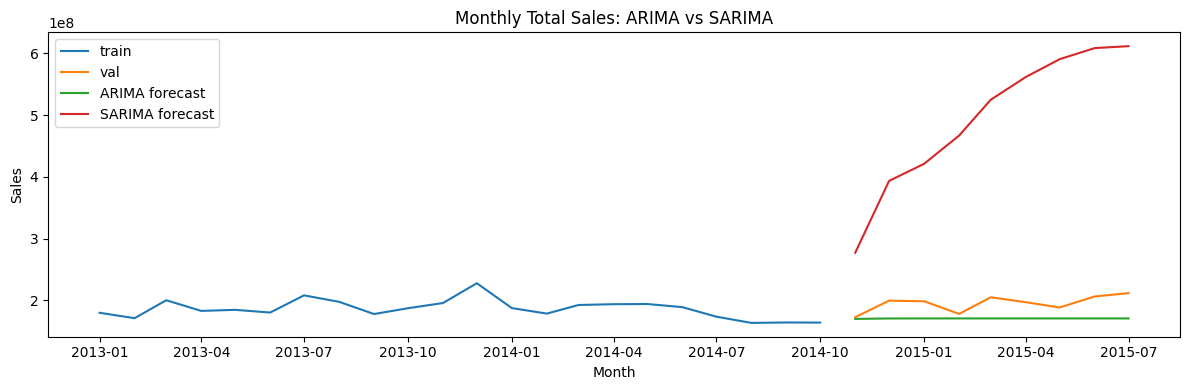

In [86]:
# CELL 6: plot actual vs forecasts

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(ts_train.index, ts_train.values, label="train")
plt.plot(ts_val.index, ts_val.values, label="val")
plt.plot(pred_arima.index, pred_arima.values, label="ARIMA forecast")
plt.plot(pred_sarima.index, pred_sarima.values, label="SARIMA forecast")
plt.title("Monthly Total Sales: ARIMA vs SARIMA")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()


In [87]:
# CELL 1: log1p transform series

ts_log = np.log1p(ts_total)

ts_train_log = ts_log[ts_log.index <= cutoff]
ts_val_log   = ts_log[ts_log.index >  cutoff]


In [88]:
# CELL 2: SARIMA on log scale (safer)

import statsmodels.api as sm

sarima_log = sm.tsa.statespace.SARIMAX(
    ts_train_log,
    order=(1,1,1),
    seasonal_order=(0,1,1,12),
    trend="n",
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

pred_log = sarima_log.get_forecast(steps=len(ts_val_log)).predicted_mean
pred_log.index = ts_val_log.index

# invert transform back to sales
pred_sarima_fixed = np.expm1(pred_log)
pred_sarima_fixed.head()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


,predicted_mean
YearMonth,
2014-11-01,1.716843e+08
2014-12-01,2.004992e+08
2015-01-01,1.653579e+08
2015-02-01,1.577535e+08
2015-03-01,1.703313e+08


In [89]:
# CELL 3: evaluate fixed SARIMA

print("SARIMA (log-fixed):", eval_ts(ts_val, pred_sarima_fixed))


SARIMA (log-fixed): {'MAE': 25119634.37214882, 'RMSE': 30385666.04513879, 'wMAPE': 0.12884290600961745, 'n': 9}


In [90]:
# CELL 1: install + import XGBoost

!pip -q install xgboost

import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [91]:
# CELL 2: metrics (includes case-study metrics + "accuracy" as 1 - wMAPE)

def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def mape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    denom = np.where(np.abs(y_true) < 1e-9, 1e-9, np.abs(y_true))
    return float(np.mean(np.abs((y_true - y_pred) / denom)))

def wmape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return float(np.sum(np.abs(y_true - y_pred)) / (np.sum(np.abs(y_true)) + 1e-9))

def metrics_pack(y_true, y_pred):
    return {
        "MAE": float(mean_absolute_error(y_true, y_pred)),
        "RMSE": rmse(y_true, y_pred),
        "MAPE": mape(y_true, y_pred),
        "wMAPE": wmape(y_true, y_pred),
        "Acc(1-wMAPE)": float(1.0 - wmape(y_true, y_pred)),
        "R2": float(r2_score(y_true, y_pred)),
        "n": int(len(y_true))
    }


In [92]:
# CELL 3: sanity check (must exist from your OHE->SVD->Scaling step)

print("Xtr:", Xtr_svd_scaled.shape, "Xva:", Xva_svd_scaled.shape)
print("y1:", y1_train.shape, y1_val.shape)
print("y2:", y2_train.shape, y2_val.shape)
print("y3:", y3_train.shape, y3_val.shape)


Xtr: (10430, 20) Xva: (6330, 20)
y1: (10430,) (6330,)
y2: (10430,) (6330,)
y3: (10430,) (6330,)


In [95]:
# CELL 4 (REPLACE): train + evaluate XGB (compatible: no eval_metric, no early_stopping args)

from xgboost import XGBRegressor

def train_eval_xgb(Xtr, ytr, Xva, yva):
    model = XGBRegressor(
        n_estimators=2000,
        learning_rate=0.03,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        min_child_weight=5,
        random_state=42,
        tree_method="hist",
    )

    # older xgboost API: no eval_metric / early_stopping_rounds
    model.fit(Xtr, ytr)

    pred_tr = model.predict(Xtr)
    pred_va = model.predict(Xva)

    train_m = metrics_pack(ytr, pred_tr)
    val_m   = metrics_pack(yva, pred_va)

    return model, train_m, val_m


In [96]:
# CELL 5: train 3 horizon models (now runs)

xgb_h1, tr1, va1 = train_eval_xgb(Xtr_svd_scaled, y1_train.values, Xva_svd_scaled, y1_val.values)
xgb_h2, tr2, va2 = train_eval_xgb(Xtr_svd_scaled, y2_train.values, Xva_svd_scaled, y2_val.values)
xgb_h3, tr3, va3 = train_eval_xgb(Xtr_svd_scaled, y3_train.values, Xva_svd_scaled, y3_val.values)

print("XGB H1  train:", tr1)
print("XGB H1  val  :", va1)
print()
print("XGB H2  train:", tr2)
print("XGB H2  val  :", va2)
print()
print("XGB H3  train:", tr3)
print("XGB H3  val  :", va3)


XGB H1  train: {'MAE': 196.03184577908976, 'RMSE': 277.4688400814481, 'MAPE': 13784850.205034368, 'wMAPE': 0.0011273780380815397, 'Acc(1-wMAPE)': 0.9988726219619185, 'R2': 0.9999784159611079, 'n': 10430}
XGB H1  val  : {'MAE': 13624.924273054898, 'RMSE': 19622.988912641347, 'MAPE': 0.07446209138756323, 'wMAPE': 0.07605572974425329, 'Acc(1-wMAPE)': 0.9239442702557468, 'R2': 0.9008265976472827, 'n': 6330}

XGB H2  train: {'MAE': 213.40389639432914, 'RMSE': 304.72250223695045, 'MAPE': 101103968.63536888, 'wMAPE': 0.0011952997553753336, 'Acc(1-wMAPE)': 0.9988047002446246, 'R2': 0.9999755505762835, 'n': 10430}
XGB H2  val  : {'MAE': 12506.206859078791, 'RMSE': 16880.72343831665, 'MAPE': 0.07530742543919156, 'wMAPE': 0.07111353168697421, 'Acc(1-wMAPE)': 0.9288864683130258, 'R2': 0.9212482819521656, 'n': 6330}

XGB H3  train: {'MAE': 218.5448030802799, 'RMSE': 309.9032039039302, 'MAPE': 164916663.0203739, 'wMAPE': 0.0012194826997429951, 'Acc(1-wMAPE)': 0.998780517300257, 'R2': 0.9999747954548

In [97]:
# CELL: XGB train/val accuracy and loss
# accuracy = 1 - wMAPE
# loss = RMSE

import numpy as np
from sklearn.metrics import mean_squared_error

def wmape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return float(np.sum(np.abs(y_true - y_pred)) / (np.sum(np.abs(y_true)) + 1e-9))

def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def acc_1_wmape(y_true, y_pred):
    return float(1.0 - wmape(y_true, y_pred))

def report(name, model, ytr, yva):
    pred_tr = model.predict(Xtr_svd_scaled)
    pred_va = model.predict(Xva_svd_scaled)
    print(
        f"{name}  "
        f"acc={acc_1_wmape(ytr, pred_tr):.6f}  val_acc={acc_1_wmape(yva, pred_va):.6f}  "
        f"loss(RMSE)={rmse(ytr, pred_tr):.6f}  val_loss(RMSE)={rmse(yva, pred_va):.6f}"
    )

report("XGB H1", xgb_h1, y1_train.values, y1_val.values)
report("XGB H2", xgb_h2, y2_train.values, y2_val.values)
report("XGB H3", xgb_h3, y3_train.values, y3_val.values)


XGB H1  acc=0.998873  val_acc=0.923944  loss(RMSE)=277.468840  val_loss(RMSE)=19622.988913
XGB H2  acc=0.998805  val_acc=0.928886  loss(RMSE)=304.722502  val_loss(RMSE)=16880.723438
XGB H3  acc=0.998781  val_acc=0.936627  loss(RMSE)=309.903204  val_loss(RMSE)=15713.063454


In [98]:
# CELL: overall (single) train acc + val acc for your model
# overall acc = average of (1 - wMAPE) across H1,H2,H3

import numpy as np

def wmape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return float(np.sum(np.abs(y_true - y_pred)) / (np.sum(np.abs(y_true)) + 1e-9))

def acc_1_wmape(y_true, y_pred):
    return float(1.0 - wmape(y_true, y_pred))

# predictions
p1_tr = xgb_h1.predict(Xtr_svd_scaled); p1_va = xgb_h1.predict(Xva_svd_scaled)
p2_tr = xgb_h2.predict(Xtr_svd_scaled); p2_va = xgb_h2.predict(Xva_svd_scaled)
p3_tr = xgb_h3.predict(Xtr_svd_scaled); p3_va = xgb_h3.predict(Xva_svd_scaled)

# horizon accuracies
acc_tr = np.mean([
    acc_1_wmape(y1_train.values, p1_tr),
    acc_1_wmape(y2_train.values, p2_tr),
    acc_1_wmape(y3_train.values, p3_tr),
])

acc_va = np.mean([
    acc_1_wmape(y1_val.values, p1_va),
    acc_1_wmape(y2_val.values, p2_va),
    acc_1_wmape(y3_val.values, p3_va),
])

print("overall_train_acc:", round(acc_tr, 6))
print("overall_val_acc  :", round(acc_va, 6))


overall_train_acc: 0.998819
overall_val_acc  : 0.929819


In [99]:
# CELL: print val metrics for XGB (H1/H2/H3)

print("H1:", va1)   # already contains MAE, RMSE, MAPE, wMAPE, R2, etc.
print("H2:", va2)
print("H3:", va3)


H1: {'MAE': 13624.924273054898, 'RMSE': 19622.988912641347, 'MAPE': 0.07446209138756323, 'wMAPE': 0.07605572974425329, 'Acc(1-wMAPE)': 0.9239442702557468, 'R2': 0.9008265976472827, 'n': 6330}
H2: {'MAE': 12506.206859078791, 'RMSE': 16880.72343831665, 'MAPE': 0.07530742543919156, 'wMAPE': 0.07111353168697421, 'Acc(1-wMAPE)': 0.9288864683130258, 'R2': 0.9212482819521656, 'n': 6330}
H3: {'MAE': 11267.036084987165, 'RMSE': 15713.063453549414, 'MAPE': 0.06796564547748946, 'wMAPE': 0.0633726727325792, 'Acc(1-wMAPE)': 0.9366273272674208, 'R2': 0.9340436572089232, 'n': 6330}


In [100]:
# CELL 1: install + imports (TensorFlow)

!pip -q install tensorflow

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models


In [101]:
# CELL 2: build per-store monthly sequence dataset (use Sales only for LSTM)

# sort
tmp = monthly_df.sort_values(["Store","YearMonth"]).copy()

# make sure targets exist on full monthly_df
tmp["y_t+1"] = tmp.groupby("Store")["Sales"].shift(-1)
tmp["y_t+2"] = tmp.groupby("Store")["Sales"].shift(-2)
tmp["y_t+3"] = tmp.groupby("Store")["Sales"].shift(-3)

# basic time features
tmp["Year"] = tmp["YearMonth"].dt.year
tmp["Month"] = tmp["YearMonth"].dt.month
tmp["Month_sin"] = np.sin(2*np.pi*tmp["Month"]/12)
tmp["Month_cos"] = np.cos(2*np.pi*tmp["Month"]/12)

# features for sequence
seq_feat_cols = ["Sales", "Month_sin", "Month_cos"]
tmp = tmp.dropna(subset=["y_t+1","y_t+2","y_t+3"]).reset_index(drop=True)

seq_len = 12  # use last 12 months to predict next 3 months
X_list, Y_list, T_list = [], [], []

for store_id, g in tmp.groupby("Store"):
    g = g.sort_values("YearMonth")
    feats = g[seq_feat_cols].values
    targ = g[["y_t+1","y_t+2","y_t+3"]].values
    months = g["YearMonth"].values

    for i in range(seq_len-1, len(g)):
        X_list.append(feats[i-seq_len+1:i+1])
        Y_list.append(targ[i])
        T_list.append(months[i])

X_seq = np.array(X_list, dtype=np.float32)   # (samples, seq_len, features)
Y_seq = np.array(Y_list, dtype=np.float32)   # (samples, 3)
T_seq = np.array(T_list)

X_seq.shape, Y_seq.shape


((17875, 12, 3), (17875, 3))

In [102]:
# CELL 3: time-based split for sequences (same cutoff)

train_mask = pd.to_datetime(T_seq) <= cutoff
val_mask   = pd.to_datetime(T_seq) >  cutoff

X_tr, X_va = X_seq[train_mask], X_seq[val_mask]
Y_tr, Y_va = Y_seq[train_mask], Y_seq[val_mask]

X_tr.shape, X_va.shape, Y_tr.shape, Y_va.shape


((11545, 12, 3), (6330, 12, 3), (11545, 3), (6330, 3))

In [103]:
# CELL 4: scale features (fit on train only)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_tr_2d = X_tr.reshape(-1, X_tr.shape[-1])
X_va_2d = X_va.reshape(-1, X_va.shape[-1])

scaler.fit(X_tr_2d)

X_tr_sc = scaler.transform(X_tr_2d).reshape(X_tr.shape)
X_va_sc = scaler.transform(X_va_2d).reshape(X_va.shape)

X_tr_sc.shape, X_va_sc.shape


((11545, 12, 3), (6330, 12, 3))

In [104]:
# CELL 5: LSTM model (outputs 3-step forecast)

tf.keras.backend.clear_session()

lstm_model = models.Sequential([
    layers.Input(shape=(seq_len, X_tr_sc.shape[-1])),
    layers.LSTM(64),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    layers.Dense(3)  # y_t+1, y_t+2, y_t+3
])

lstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="mse",
    metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse"),
             tf.keras.metrics.MeanAbsoluteError(name="mae")]
)

lstm_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,763 (85.01 KB)

 Trainable params: 21,763 (85.01 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
# CELL 6: train LSTM (shows train/val loss)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, factor=0.5, min_lr=1e-5)
]

hist = lstm_model.fit(
    X_tr_sc, Y_tr,
    validation_data=(X_va_sc, Y_va),
    epochs=50,
    batch_size=256,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 34502152192.0000 - mae: 175446.2188 - rmse: 185746.3438 - val_loss: 35287146496.0000 - val_mae: 177588.3125 - val_rmse: 187848.7344 - learning_rate: 0.0010
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 34932047872.0000 - mae: 176510.9219 - rmse: 186899.9219 - val_loss: 35271495680.0000 - val_mae: 177542.9531 - val_rmse: 187807.0625 - learning_rate: 0.0010
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 34864050176.0000 - mae: 176478.6562 - rmse: 186717.7188 - val_loss: 35247955968.0000 - val_mae: 177476.6875 - val_rmse: 187744.3906 - learning_rate: 0.0010
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 34515832832.0000 - mae: 175911.2188 - rmse: 185783.3125 - val_loss: 35215577088.0000 - val_mae: 177385.4375 - val_rmse: 187658.1406 - learning_rate: 0.0010
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 34737455104.0000 - mae: 176158.2188 - rmse: 186379.0312 - val_loss: 35174150144.0000 

In [106]:
# CELL 7: evaluate LSTM with your hackathon metrics (wMAPE + acc = 1-wMAPE)

from sklearn.metrics import mean_squared_error, mean_absolute_error

def wmape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return float(np.sum(np.abs(y_true - y_pred)) / (np.sum(np.abs(y_true)) + 1e-9))

def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

pred_va = lstm_model.predict(X_va_sc, batch_size=256)

for i, name in enumerate(["H1","H2","H3"]):
    y_true = Y_va[:, i]
    y_pred = pred_va[:, i]
    w = wmape(y_true, y_pred)
    print(name,
          "wMAPE=", round(w, 6),
          "val_acc=", round(1-w, 6),
          "RMSE=", round(rmse(y_true, y_pred), 3),
          "MAE=", round(mean_absolute_error(y_true, y_pred), 3))


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
H1 wMAPE= 0.848759 val_acc= 0.151241 RMSE= 164322.589 MAE= 152049.984
H2 wMAPE= 0.846322 val_acc= 0.153678 RMSE= 160532.598 MAE= 148836.422
H3 wMAPE= 0.846733 val_acc= 0.153267 RMSE= 162498.962 MAE= 150540.766


In [107]:
# CELL 8: BiLSTM model (often slightly better)

tf.keras.backend.clear_session()

bilstm_model = models.Sequential([
    layers.Input(shape=(seq_len, X_tr_sc.shape[-1])),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    layers.Dense(3)
])

bilstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="mse",
    metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse"),
             tf.keras.metrics.MeanAbsoluteError(name="mae")]
)

hist2 = bilstm_model.fit(
    X_tr_sc, Y_tr,
    validation_data=(X_va_sc, Y_va),
    epochs=50,
    batch_size=256,
    callbacks=callbacks,
    verbose=1
)

pred_va2 = bilstm_model.predict(X_va_sc, batch_size=256)

for i, name in enumerate(["H1","H2","H3"]):
    y_true = Y_va[:, i]
    y_pred = pred_va2[:, i]
    w = wmape(y_true, y_pred)
    print("BiLSTM", name,
          "wMAPE=", round(w, 6),
          "val_acc=", round(1-w, 6),
          "RMSE=", round(rmse(y_true, y_pred), 3),
          "MAE=", round(mean_absolute_error(y_true, y_pred), 3))


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 34561933312.0000 - mae: 175888.7656 - rmse: 185902.2031 - val_loss: 35286564864.0000 - val_mae: 177586.6094 - val_rmse: 187847.1875 - learning_rate: 0.0010
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 34620452864.0000 - mae: 176083.0938 - rmse: 186064.3594 - val_loss: 35260407808.0000 - val_mae: 177511.6719 - val_rmse: 187777.5469 - learning_rate: 0.0010
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 34988077056.0000 - mae: 176544.8906 - rmse: 187046.8438 - val_loss: 35218853888.0000 - val_mae: 177394.5312 - val_rmse: 187666.8750 - learning_rate: 0.0010
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 34130739200.0000 - mae: 174914.1875 - rmse: 184741.7031 - val_loss: 35161202688.0000 - val_mae: 177231.9375 - val_rmse: 187513.2031 - learning_rate: 0.0010
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 34487242752.0000 - mae: 175534.4688 - rmse: 185705.6875 - val_loss: 35087237120.00

In [108]:
# CELL 1: build monthly features for LSTM (richer)

import numpy as np
import pandas as pd

seq_df = monthly_df.copy()
seq_df = seq_df.sort_values(["Store","YearMonth"]).reset_index(drop=True)

# merge static store info if you have it in monthly_df already skip; else:
# seq_df = seq_df.merge(store[["Store","StoreType","Assortment","Promo2"]], on="Store", how="left")

# time features
seq_df["Month"] = seq_df["YearMonth"].dt.month
seq_df["Month_sin"] = np.sin(2*np.pi*seq_df["Month"]/12)
seq_df["Month_cos"] = np.cos(2*np.pi*seq_df["Month"]/12)

# log transform sales (helps a lot)
seq_df["logSales"] = np.log1p(seq_df["Sales"])

# targets on log scale
seq_df["y1"] = seq_df.groupby("Store")["logSales"].shift(-1)
seq_df["y2"] = seq_df.groupby("Store")["logSales"].shift(-2)
seq_df["y3"] = seq_df.groupby("Store")["logSales"].shift(-3)

seq_df = seq_df.dropna(subset=["y1","y2","y3"]).reset_index(drop=True)
seq_df.head()


,Store,YearMonth,Sales,Customers,OpenDays,PromoDays,SchoolHolidayDays,StateHolidayDays,CompetitionDistance,StoreType,...,y_t+2,y_t+3,roll3,Month,Month_sin,Month_cos,logSales,y1,y2,y3
0,1,2013-01-01,128431,15899,26,10,11,1,1270.0,c,...,145169.0,118009.0,NaN,1,0.500000,8.660254e-01,11.763155,11.738243,11.885661,11.678525
1,1,2013-02-01,125271,15189,24,10,0,0,1270.0,c,...,118009.0,118225.0,NaN,2,0.866025,5.000000e-01,11.738243,11.885661,11.678525,11.680353
2,1,2013-03-01,145169,17574,25,15,5,1,1270.0,c,...,118225.0,113411.0,NaN,3,1.000000,6.123234e-17,11.885661,11.678525,11.680353,11.638782
3,1,2013-04-01,118009,14382,25,12,5,1,1270.0,c,...,113411.0,128032.0,132957.0,4,0.866025,-5.000000e-01,11.678525,11.680353,11.638782,11.760043
4,1,2013-05-01,118225,13965,23,13,0,4,1270.0,c,...,128032.0,118320.0,129483.0,5,0.500000,-8.660254e-01,11.680353,11.638782,11.760043,11.681157


In [109]:
# CELL 2: choose numeric features for sequence (add what exists)

cand = [
    "logSales",
    "Month_sin","Month_cos",
    "Promo", "Customers", "SchoolHoliday",
    "CompetitionDistance", "Promo2"
]

seq_feat_cols = [c for c in cand if c in seq_df.columns]
print("seq features:", seq_feat_cols)


seq features: ['logSales', 'Month_sin', 'Month_cos', 'Customers', 'CompetitionDistance', 'Promo2']


In [110]:
# CELL 3: build sequences + store_id array

seq_len = 12

# store id -> 0..n-1
store_ids = seq_df["Store"].astype(int).values
unique_stores = np.unique(store_ids)
store_to_idx = {s:i for i,s in enumerate(unique_stores)}
seq_df["StoreIdx"] = seq_df["Store"].map(store_to_idx).astype(int)

X_list, S_list, Y_list, T_list = [], [], [], []

for sid, g in seq_df.groupby("StoreIdx"):
    g = g.sort_values("YearMonth")
    feats = g[seq_feat_cols].values.astype(np.float32)
    y = g[["y1","y2","y3"]].values.astype(np.float32)
    t = g["YearMonth"].values

    for i in range(seq_len-1, len(g)):
        X_list.append(feats[i-seq_len+1:i+1])
        S_list.append(sid)
        Y_list.append(y[i])
        T_list.append(t[i])

X_seq = np.array(X_list, dtype=np.float32)         # (N, seq_len, F)
S_seq = np.array(S_list, dtype=np.int32)           # (N,)
Y_seq = np.array(Y_list, dtype=np.float32)         # (N, 3)
T_seq = pd.to_datetime(np.array(T_list))

X_seq.shape, S_seq.shape, Y_seq.shape


((17875, 12, 6), (17875,), (17875, 3))

In [111]:
# CELL 4: time split + scaling (train only)

from sklearn.preprocessing import StandardScaler

train_mask = T_seq <= cutoff
val_mask   = T_seq >  cutoff

X_tr, X_va = X_seq[train_mask], X_seq[val_mask]
S_tr, S_va = S_seq[train_mask], S_seq[val_mask]
Y_tr, Y_va = Y_seq[train_mask], Y_seq[val_mask]

scaler = StandardScaler()
X_tr_2d = X_tr.reshape(-1, X_tr.shape[-1])
X_va_2d = X_va.reshape(-1, X_va.shape[-1])

scaler.fit(X_tr_2d)
X_tr_sc = scaler.transform(X_tr_2d).reshape(X_tr.shape)
X_va_sc = scaler.transform(X_va_2d).reshape(X_va.shape)

X_tr_sc.shape, X_va_sc.shape, Y_tr.shape, Y_va.shape


((11545, 12, 6), (6330, 12, 6), (11545, 3), (6330, 3))

In [112]:
# CELL 5: BiLSTM with Store embedding (log targets)

import tensorflow as tf
from tensorflow.keras import layers, Model

tf.keras.backend.clear_session()

num_stores = int(S_seq.max()) + 1
F = X_tr_sc.shape[-1]

inp_seq = layers.Input(shape=(seq_len, F), name="seq")
inp_store = layers.Input(shape=(), dtype="int32", name="store")

emb = layers.Embedding(input_dim=num_stores, output_dim=16, name="store_emb")(inp_store)
emb = layers.RepeatVector(seq_len)(emb)

x = layers.Concatenate(axis=-1)([inp_seq, emb])
x = layers.Bidirectional(layers.LSTM(64, return_sequences=False))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation="relu")(x)
out = layers.Dense(3, name="out")(x)   # predicts log y1,y2,y3

model = Model([inp_seq, inp_store], out)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="mse")
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ store (InputLayer)  │ (None)            │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ store_emb           │ (None, 16)        │     17,840 │ store[0][0]       │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ seq (InputLayer)    │ (None, 12, 6)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 12, 16)    │          0 │ store_emb[0][0]   │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 12, 22)    │          0 │ seq[0][0],        │
│ (Concatenate)       │                   │            │ repeat_vector[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 128)       │     44,544 │ concatenate[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ out (Dense)         │ (None, 3)         │        195 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 70,835 (276.70 KB)

 Trainable params: 70,835 (276.70 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
# train full 50 epochs (no early stopping)

hist = model.fit(
    {"seq": X_tr_sc, "store": S_tr},
    Y_tr,
    validation_data=({"seq": X_va_sc, "store": S_va}, Y_va),
    epochs=50,
    batch_size=256,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=4, factor=0.5, min_lr=1e-5)],
    verbose=1
)


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4646 - val_loss: 0.0353 - learning_rate: 6.2500e-05
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4409 - val_loss: 0.0284 - learning_rate: 6.2500e-05
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4578 - val_loss: 0.0306 - learning_rate: 6.2500e-05
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4267 - val_loss: 0.0322 - learning_rate: 6.2500e-05
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4415 - val_loss: 0.0326 - learning_rate: 6.2500e-05
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4202 - val_loss: 0.0315 - learning_rate: 6.2500e-05
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4617 - val_loss: 0.0314 - learning_rate: 3.1250e-05
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4307 - val_loss: 0.0325 - learning_rate: 3.1250e-05
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4314 - val_loss: 0.0322 - learning_

In [116]:
# CELL 7: evaluate back in original Sales scale (wMAPE + val_acc)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def wmape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return float(np.sum(np.abs(y_true - y_pred)) / (np.sum(np.abs(y_true)) + 1e-9))

def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

pred_log = model.predict({"seq": X_va_sc, "store": S_va}, batch_size=256)

# invert log1p
pred = np.expm1(pred_log)
true = np.expm1(Y_va)

for i, name in enumerate(["H1","H2","H3"]):
    w = wmape(true[:, i], pred[:, i])
    print(
        name,
        "wMAPE=", round(w, 6),
        "val_acc=", round(1-w, 6),
        "RMSE=", round(rmse(true[:, i], pred[:, i]), 3),
        "MAE=", round(mean_absolute_error(true[:, i], pred[:, i]), 3),
    )


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
H1 wMAPE= 0.136642 val_acc= 0.863358 RMSE= 32971.563 MAE= 24478.498
H2 wMAPE= 0.134406 val_acc= 0.865594 RMSE= 30612.269 MAE= 23636.998
H3 wMAPE= 0.11917 val_acc= 0.88083 RMSE= 28649.958 MAE= 21187.238


In [127]:
# CELL 2: metric (use wMAPE for tuning)

def wmape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return float(np.sum(np.abs(y_true - y_pred)) / (np.sum(np.abs(y_true)) + 1e-9))


In [128]:
# CELL 3: optuna objective (tune one set of params using avg val wMAPE across H1/H2/H3)

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 400, 3000, step=200),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "min_child_weight": trial.suggest_float("min_child_weight", 1.0, 20.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-3, 50.0, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-3, 10.0, log=True),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "random_state": 42,
        "tree_method": "hist",
        "n_jobs": -1,
    }

    # train 3 horizon models with same params
    m1 = XGBRegressor(**params).fit(Xtr_svd_scaled, y1_train.values)
    m2 = XGBRegressor(**params).fit(Xtr_svd_scaled, y2_train.values)
    m3 = XGBRegressor(**params).fit(Xtr_svd_scaled, y3_train.values)

    p1 = m1.predict(Xva_svd_scaled)
    p2 = m2.predict(Xva_svd_scaled)
    p3 = m3.predict(Xva_svd_scaled)

    w1 = wmape(y1_val.values, p1)
    w2 = wmape(y2_val.values, p2)
    w3 = wmape(y3_val.values, p3)

    return (w1 + w2 + w3) / 3.0  # minimize avg wMAPE


In [131]:
# CELL 4: run tuning
# CELL 1: install optuna

!pip -q install optuna
import optuna
import numpy as np
from xgboost import XGBRegressor


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

print("best avg wMAPE:", study.best_value)
print("best params:", study.best_params)


[I 2025-12-12 11:54:34,683] A new study created in memory with name: no-name-2f00247c-e157-4b6e-83f5-e2bf46de714a
[I 2025-12-12 11:55:33,314] Trial 0 finished with value: 0.07043061037687949 and parameters: {'n_estimators': 2800, 'learning_rate': 0.10472784961071263, 'max_depth': 10, 'subsample': 0.8168549469905652, 'colsample_bytree': 0.9107128355435744, 'min_child_weight': 4.277556904269274, 'reg_lambda': 33.115927175350926, 'reg_alpha': 0.019049406058417366, 'gamma': 2.9797141872289896}. Best is trial 0 with value: 0.07043061037687949.
[I 2025-12-12 11:55:35,377] Trial 1 finished with value: 0.0714491621246899 and parameters: {'n_estimators': 600, 'learning_rate': 0.014272366669799478, 'max_depth': 5, 'subsample': 0.7410047920018065, 'colsample_bytree': 0.9888101180831259, 'min_child_weight': 10.909671804933057, 'reg_lambda': 41.21531567298614, 'reg_alpha': 3.217792478890676, 'gamma': 1.629216637367004}. Best is trial 0 with value: 0.07043061037687949.
[I 2025-12-12 11:55:56,268] Tr

best avg wMAPE: 0.06981830741260402
best params: {'n_estimators': 1400, 'learning_rate': 0.013837378903139637, 'max_depth': 11, 'subsample': 0.7032363330797095, 'colsample_bytree': 0.7379609514506087, 'min_child_weight': 16.40142923952142, 'reg_lambda': 34.979210981865116, 'reg_alpha': 0.022038928508822126, 'gamma': 2.5011190802281553}


In [132]:
# CELL: train final XGB models using Optuna BEST params + print val wMAPE/val_acc

from xgboost import XGBRegressor
import numpy as np

def wmape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return float(np.sum(np.abs(y_true - y_pred)) / (np.sum(np.abs(y_true)) + 1e-9))

best_params = {
    "n_estimators": 1400,
    "learning_rate": 0.013837378903139637,
    "max_depth": 11,
    "subsample": 0.7032363330797095,
    "colsample_bytree": 0.7379609514506087,
    "min_child_weight": 16.40142923952142,
    "reg_lambda": 34.979210981865116,
    "reg_alpha": 0.022038928508822126,
    "gamma": 2.5011190802281553,
    "random_state": 42,
    "tree_method": "hist",
    "n_jobs": -1,
}

xgb_h1_opt = XGBRegressor(**best_params).fit(Xtr_svd_scaled, y1_train.values)
xgb_h2_opt = XGBRegressor(**best_params).fit(Xtr_svd_scaled, y2_train.values)
xgb_h3_opt = XGBRegressor(**best_params).fit(Xtr_svd_scaled, y3_train.values)

p1 = xgb_h1_opt.predict(Xva_svd_scaled)
p2 = xgb_h2_opt.predict(Xva_svd_scaled)
p3 = xgb_h3_opt.predict(Xva_svd_scaled)

w1 = wmape(y1_val.values, p1); a1 = 1 - w1
w2 = wmape(y2_val.values, p2); a2 = 1 - w2
w3 = wmape(y3_val.values, p3); a3 = 1 - w3

print("H1  val_wMAPE:", w1, " val_acc:", a1)
print("H2  val_wMAPE:", w2, " val_acc:", a2)
print("H3  val_wMAPE:", w3, " val_acc:", a3)

avg_w = (w1 + w2 + w3) / 3
print("AVG val_wMAPE:", avg_w, " AVG val_acc:", 1 - avg_w)


H1  val_wMAPE: 0.0764069779632946  val_acc: 0.9235930220367055
H2  val_wMAPE: 0.06990470275142902  val_acc: 0.930095297248571
H3  val_wMAPE: 0.06314324152308845  val_acc: 0.9368567584769115
AVG val_wMAPE: 0.06981830741260402  AVG val_acc: 0.930181692587396


In [143]:
# CELL: train final XGB models (Optuna params) + print wMAPE/Acc + MAPE

from xgboost import XGBRegressor
import numpy as np

def wmape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return float(np.sum(np.abs(y_true - y_pred)) / (np.sum(np.abs(y_true)) + 1e-9))

def mape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    denom = np.maximum(np.abs(y_true), 1e-9)
    return float(np.mean(np.abs((y_true - y_pred) / denom)))

best_params = {
    "n_estimators": 1400,
    "learning_rate": 0.013837378903139637,
    "max_depth": 11,
    "subsample": 0.7032363330797095,
    "colsample_bytree": 0.7379609514506087,
    "min_child_weight": 16.40142923952142,
    "reg_lambda": 34.979210981865116,
    "reg_alpha": 0.022038928508822126,
    "gamma": 2.5011190802281553,
    "random_state": 42,
    "tree_method": "hist",
    "n_jobs": -1,
}

xgb_h1_opt = XGBRegressor(**best_params).fit(Xtr_svd_scaled, y1_train.values)
xgb_h2_opt = XGBRegressor(**best_params).fit(Xtr_svd_scaled, y2_train.values)
xgb_h3_opt = XGBRegressor(**best_params).fit(Xtr_svd_scaled, y3_train.values)

p1 = xgb_h1_opt.predict(Xva_svd_scaled)
p2 = xgb_h2_opt.predict(Xva_svd_scaled)
p3 = xgb_h3_opt.predict(Xva_svd_scaled)

w1 = wmape(y1_val.values, p1); a1 = 1 - w1; m1 = mape(y1_val.values, p1)
w2 = wmape(y2_val.values, p2); a2 = 1 - w2; m2 = mape(y2_val.values, p2)
w3 = wmape(y3_val.values, p3); a3 = 1 - w3; m3 = mape(y3_val.values, p3)

print("H1  val_wMAPE:", w1, " val_acc:", a1, " MAPE:", m1)
print("H2  val_wMAPE:", w2, " val_acc:", a2, " MAPE:", m2)
print("H3  val_wMAPE:", w3, " val_acc:", a3, " MAPE:", m3)

avg_w = (w1 + w2 + w3) / 3
avg_m = (m1 + m2 + m3) / 3
print("AVG val_wMAPE:", avg_w, " AVG val_acc:", 1 - avg_w, " AVG MAPE:", avg_m)


H1  val_wMAPE: 0.0764069779632946  val_acc: 0.9235930220367055  MAPE: 0.07516675352798571
H2  val_wMAPE: 0.06990470275142902  val_acc: 0.930095297248571  MAPE: 0.07483583159168539
H3  val_wMAPE: 0.06314324152308845  val_acc: 0.9368567584769115  MAPE: 0.06779279824081506
AVG val_wMAPE: 0.06981830741260402  AVG val_acc: 0.930181692587396  AVG MAPE: 0.07259846112016205


In [133]:
# CELL 1: create results dict + save as json/csv

import os, json
import pandas as pd

out_dir = "/content/rossmann_outputs"
os.makedirs(out_dir, exist_ok=True)

results = {
    "H1": {"val_wMAPE": float(w1), "val_acc": float(a1)},
    "H2": {"val_wMAPE": float(w2), "val_acc": float(a2)},
    "H3": {"val_wMAPE": float(w3), "val_acc": float(a3)},
    "AVG": {"val_wMAPE": float(avg_w), "val_acc": float(1-avg_w)},
}

# JSON
with open(os.path.join(out_dir, "xgb_optuna_results.json"), "w") as f:
    json.dump(results, f, indent=2)

# CSV
pd.DataFrame(results).T.to_csv(os.path.join(out_dir, "xgb_optuna_results.csv"), index=True)

print("saved:", os.listdir(out_dir))


saved: ['xgb_optuna_results.json', 'xgb_optuna_results.csv']


In [148]:
# CELL: recreate + fit OneHotEncoder from your TRAIN RAW dataframe, then save it
# (uses X_train_raw if you have it; otherwise builds it from your monthly_df train split)

import os, joblib
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

out_dir = "/content/rossmann_outputs"
os.makedirs(out_dir, exist_ok=True)

# 1) get the raw training dataframe used BEFORE OHE
# try common variable names first
raw = None
for n in ["X_train_raw", "Xtr_raw", "train_raw", "df_train_raw", "X_train", "Xtr"]:
    if n in globals():
        raw = globals()[n]
        break

# fallback: build from monthly_df using your cutoff (assumes monthly_df exists)
if raw is None:
    raw = monthly_df[monthly_df["YearMonth"] <= cutoff].copy()

# 2) choose categorical columns that you used earlier (keep only those that exist)
cat_candidates = ["Store", "StoreType", "Assortment", "PromoInterval", "StateHoliday"]
cat_cols = [c for c in cat_candidates if c in raw.columns]

if len(cat_cols) == 0:
    raise ValueError("No categorical columns found to fit OneHotEncoder. Check your raw training dataframe columns.")

# 3) fit encoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
ohe.fit(raw[cat_cols])

# 4) save it
joblib.dump(ohe, os.path.join(out_dir, "ohe.pkl"))

print("Fitted OHE on cols:", cat_cols)
print("Saved:", os.path.join(out_dir, "ohe.pkl"))


Fitted OHE on cols: ['Store', 'StoreType', 'Assortment', 'PromoInterval']
Saved: /content/rossmann_outputs/ohe.pkl


In [134]:
# CELL 1: install + imports

!pip -q install shap

import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [135]:
# CELL 2: prepare SHAP input sample (use val sample to keep it fast)

# feature names for SVD components
n_feat = Xva_svd_scaled.shape[1]
feat_names = [f"svd_{i}" for i in range(n_feat)]

# sample rows from validation for SHAP (increase/decrease if needed)
np.random.seed(42)
idx = np.random.choice(np.arange(Xva_svd_scaled.shape[0]), size=min(2000, Xva_svd_scaled.shape[0]), replace=False)

X_shap = Xva_svd_scaled[idx]
X_shap_df = pd.DataFrame(X_shap, columns=feat_names)

X_shap_df.shape


(2000, 20)

/tmp/ipython-input-587098215.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals_h1, X_shap_df, show=True)


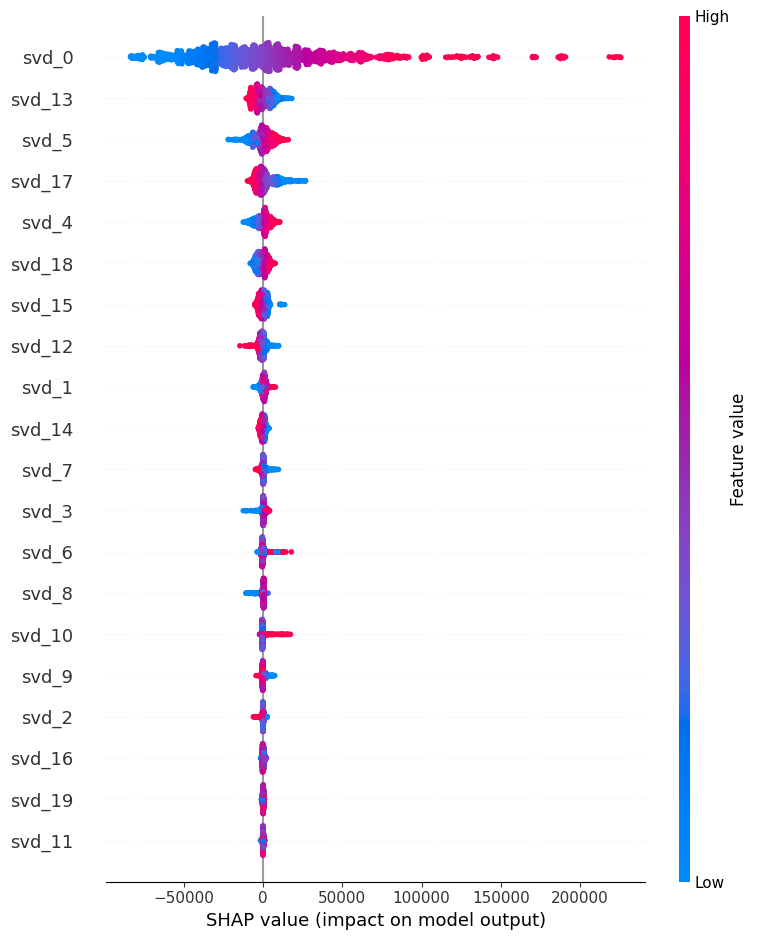

In [136]:
# CELL 3: SHAP for H1 model

explainer_h1 = shap.TreeExplainer(xgb_h1_opt)
shap_vals_h1 = explainer_h1.shap_values(X_shap)

shap.summary_plot(shap_vals_h1, X_shap_df, show=True)


/tmp/ipython-input-1103158934.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals_h1, X_shap_df, plot_type="bar", show=True)


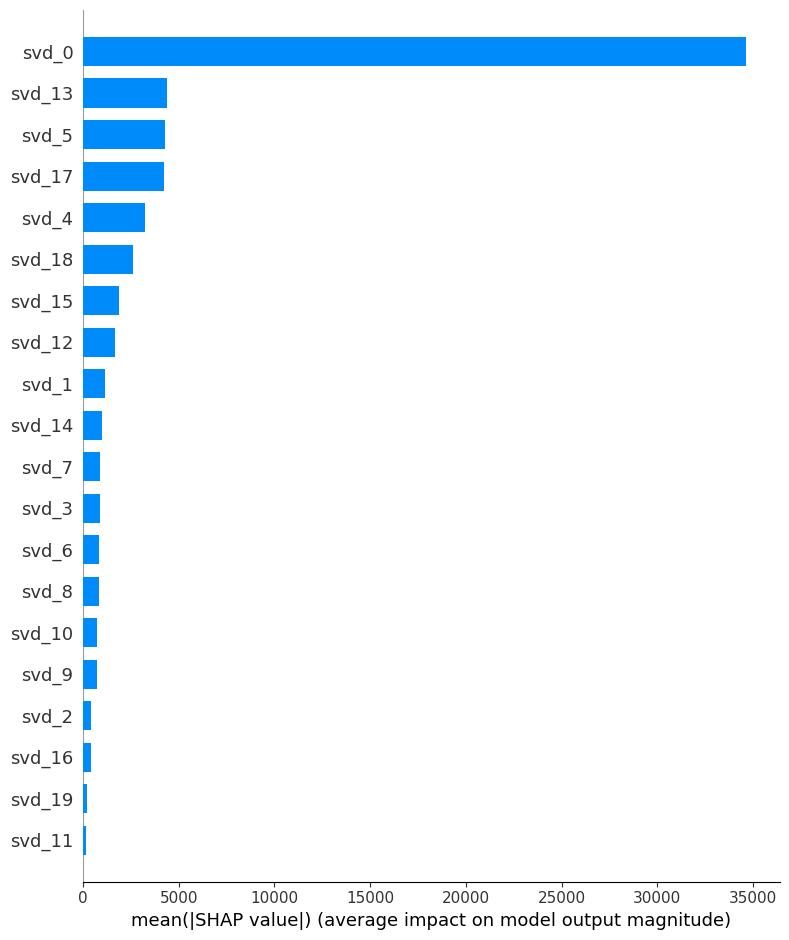

In [137]:
# CELL 4: SHAP bar plot (global importance) for H1

shap.summary_plot(shap_vals_h1, X_shap_df, plot_type="bar", show=True)


/tmp/ipython-input-2770120805.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals_h2, X_shap_df, show=True)


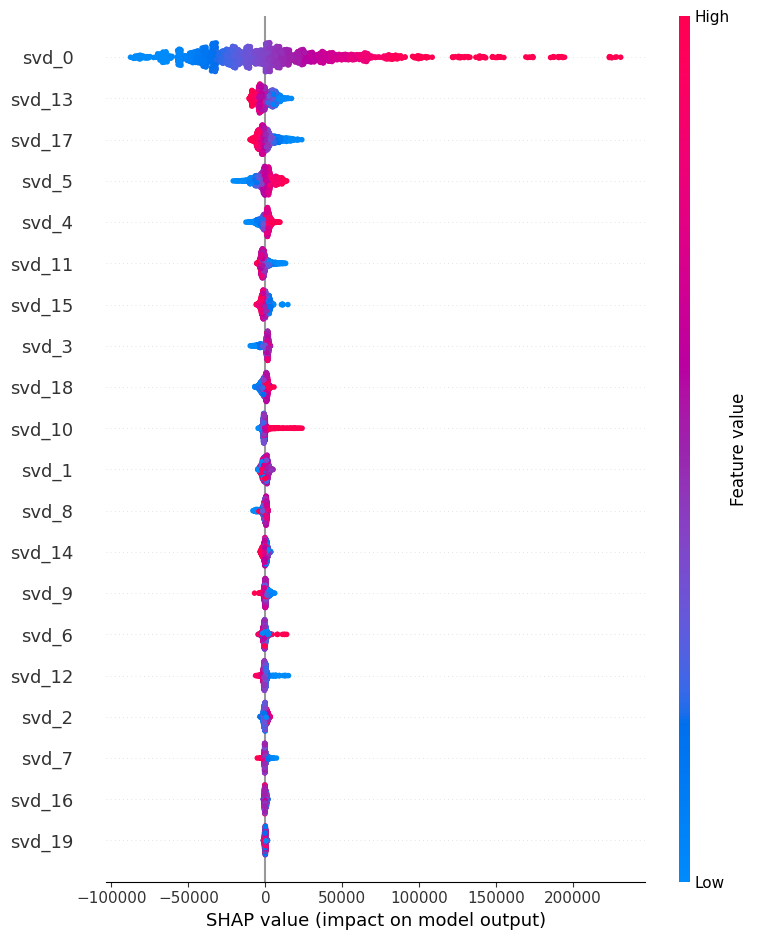

/tmp/ipython-input-2770120805.py:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals_h2, X_shap_df, plot_type="bar", show=True)


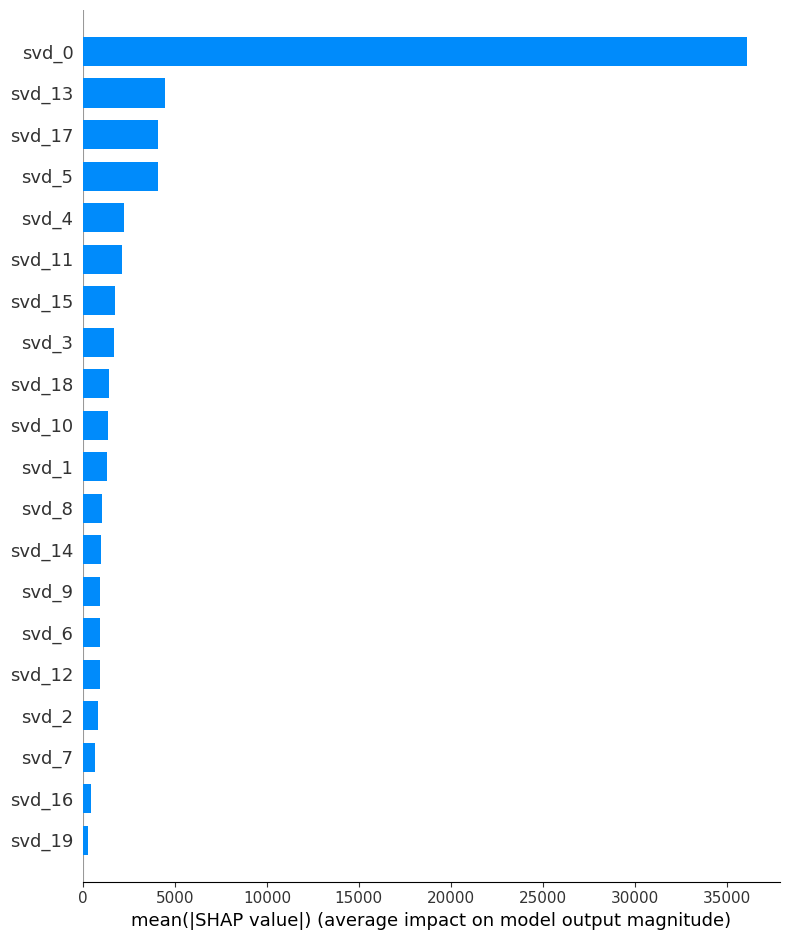

In [138]:
# CELL 5: SHAP for H2 model

explainer_h2 = shap.TreeExplainer(xgb_h2_opt)
shap_vals_h2 = explainer_h2.shap_values(X_shap)

shap.summary_plot(shap_vals_h2, X_shap_df, show=True)
shap.summary_plot(shap_vals_h2, X_shap_df, plot_type="bar", show=True)


/tmp/ipython-input-1186373146.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals_h3, X_shap_df, show=True)


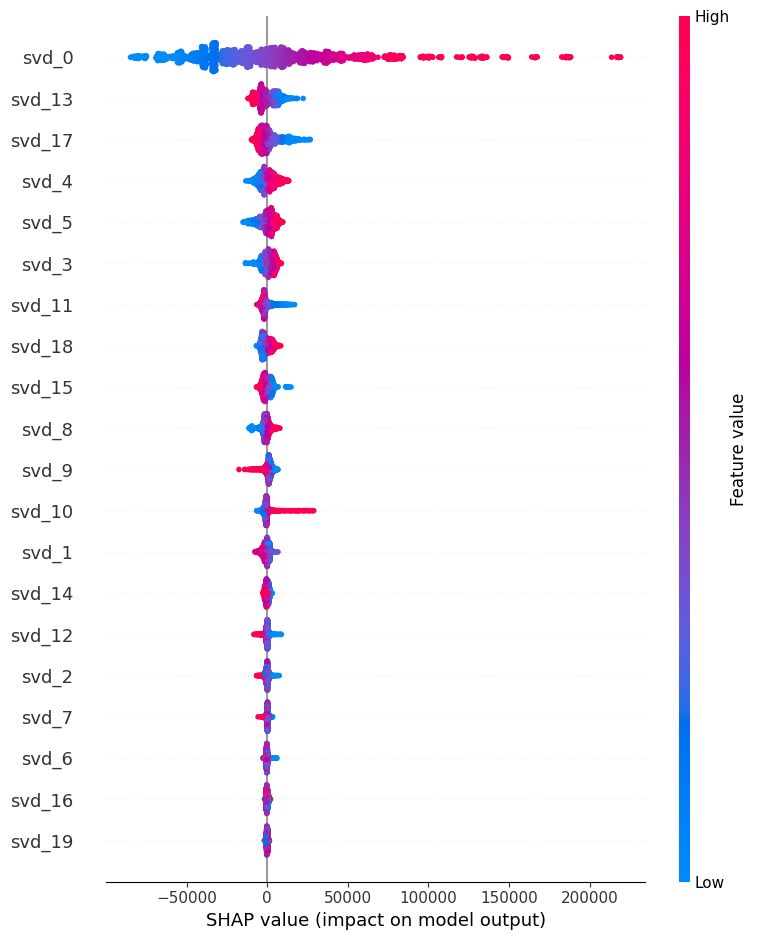

/tmp/ipython-input-1186373146.py:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals_h3, X_shap_df, plot_type="bar", show=True)


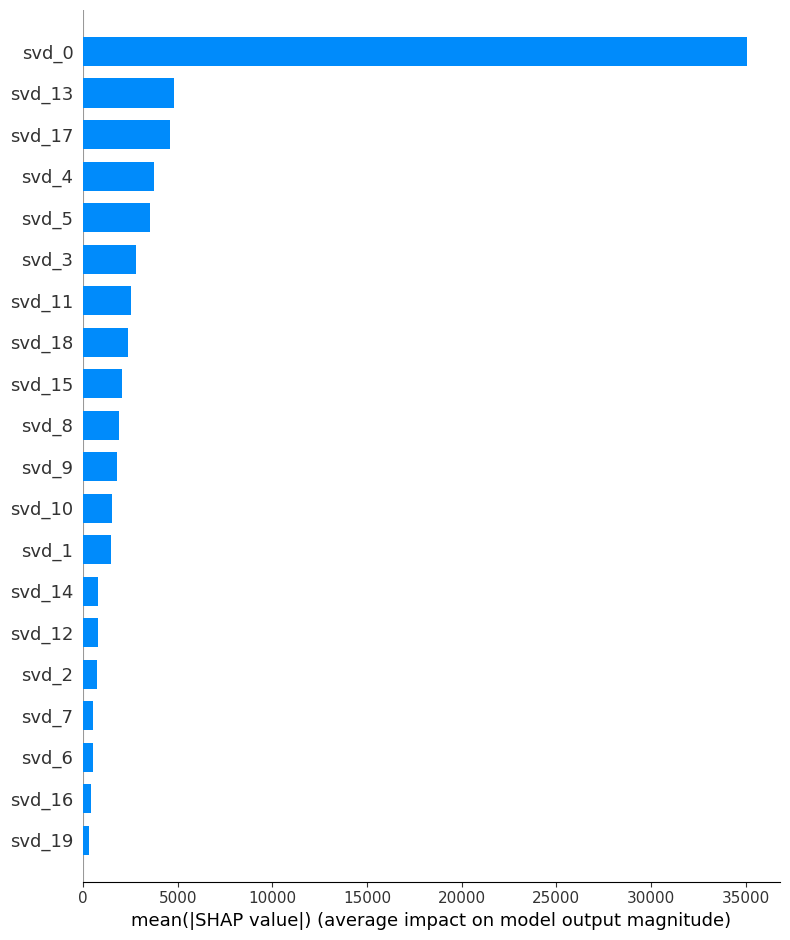

In [139]:
# CELL 6: SHAP for H3 model

explainer_h3 = shap.TreeExplainer(xgb_h3_opt)
shap_vals_h3 = explainer_h3.shap_values(X_shap)

shap.summary_plot(shap_vals_h3, X_shap_df, show=True)
shap.summary_plot(shap_vals_h3, X_shap_df, plot_type="bar", show=True)


In [144]:
# CELL 2: if you SAVED it earlier, load it (recommended)

import joblib

ohe = joblib.load("/content/rossmann_outputs/ohe.pkl")
print(type(ohe))


FileNotFoundError: [Errno 2] No such file or directory: '/content/rossmann_outputs/ohe.pkl'